At this point in the project we will try to clean and organize the data in an easier way to understand and to work on.
After that we will try to vizualize the diffrences between the japanese meta and the westren meta

In [197]:
import time      
import os         
import re

import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
def load_csv(file_name):
    df =  pd.read_csv(file_name)
    return df;

First we will clean all of the duplicate cards.
Some cards got reprinted and thats why they might appear more then once in the dataframe

In [199]:
file_name = 'file1.csv'
df_unclean = load_csv(file_name)
df_unclean

,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
0,ST1-01,Koromon,Red,Uncommon,Digi-Egg,2.0,In-Training,Lesser,NaN,NaN,...,46,10,51,44,2,0,0,5,4,0
1,ST1-02,Piyomon,Red,Common,Digimon,3.0,Rookie,Bird,2.0,3000.0,...,155,39,18,37,0,7,0,0,1,0
2,ST1-03,Agumon,Red,Uncommon,Digimon,3.0,Rookie,Reptile,3.0,2000.0,...,201,61,125,105,26,0,6,13,17,3
3,ST1-04,Dracomon,Red,Common,Digimon,3.0,Rookie,Dragon,3.0,4000.0,...,0,0,0,0,0,0,0,0,0,0
4,ST1-05,Birdramon,Red,Common,Digimon,4.0,Champion,Giant Bird,4.0,5000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,P-038,Green Memory Boost!!,Green,Promo,Option,NaN,NaN,NaN,3.0,NaN,...,0,0,15,25,3,3,9,31,111,34
1569,P-039,Black Memory Boost!!,Black,Promo,Option,NaN,NaN,NaN,3.0,NaN,...,0,0,8,39,7,19,9,31,85,39
1570,P-040,Violet Memory Boost!!,Purple,Promo,Option,NaN,NaN,NaN,3.0,NaN,...,0,0,27,39,0,30,4,18,15,4
1571,P-028,Pulsemon,Yellow,Promo,Digimon,3.0,Rookie,Beastkin,3.0,2000.0,...,0,0,61,88,32,27,7,6,4,3


In [200]:
df_clean =  df_unclean.drop_duplicates('card_code',keep='first', ignore_index = True) 
df_clean = df_clean.fillna('')
df_clean

,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
0,ST1-01,Koromon,Red,Uncommon,Digi-Egg,2.0,In-Training,Lesser,,,...,46,10,51,44,2,0,0,5,4,0
1,ST1-02,Piyomon,Red,Common,Digimon,3.0,Rookie,Bird,2.0,3000.0,...,155,39,18,37,0,7,0,0,1,0
2,ST1-03,Agumon,Red,Uncommon,Digimon,3.0,Rookie,Reptile,3.0,2000.0,...,201,61,125,105,26,0,6,13,17,3
3,ST1-04,Dracomon,Red,Common,Digimon,3.0,Rookie,Dragon,3.0,4000.0,...,0,0,0,0,0,0,0,0,0,0
4,ST1-05,Birdramon,Red,Common,Digimon,4.0,Champion,Giant Bird,4.0,5000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,P-076,Deltamon,Black/Red,Promo,Digimon,4.0,Champion,Composite,5.0,6000.0,...,0,0,0,0,0,0,0,0,11,0
1532,P-077,Wizarmon,Purple,Promo,Digimon,4.0,Champion,Wizard,5.0,5000.0,...,0,0,0,0,0,0,0,0,13,0
1533,P-079,Agumon,Red,Promo,Digimon,3.0,Rookie,Reptile,3.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
1534,P-080,Labramon,Purple,Promo,Digimon,3.0,Rookie,Beast,3.0,2000.0,...,0,0,0,0,0,0,0,0,0,0


First we will calculate the percentage of playability by dividing the amount of each card by the total amount of cards from
decks in the meta.
after that we will multiply by 100 to get a precentage

In [201]:
for i in range (1,11):
    sum_decks = sum(df_clean['jp_meta_decks' + str(i)])
    df_clean['jp_meta_decks' + str(i)] = df_clean['jp_meta_decks' + str(i)].astype(float)
    for j in range (0,len(df_clean['card_name'])):
        df_clean.at[j,'jp_meta_decks' + str(i)] = ( df_clean.at[j,'jp_meta_decks' + str(i)] / sum_decks)
        
for i in range (1,9):
    sum_decks = sum(df_clean['west_meta_decks' + str(i)])
    df_clean['west_meta_decks' + str(i)] = df_clean['west_meta_decks' + str(i)].astype(float)
    for j in range (0,len(df_clean['card_name'])):
        df_clean.at[j,'west_meta_decks' + str(i)] = ( df_clean.at[j,'west_meta_decks' + str(i)] / sum_decks)

for i in range (0, len(df_clean['card_name'])):
    for j in range (1, 11):
        df_clean.at[i, 'jp_meta_decks'+str(j)] =  df_clean.at[i, 'jp_meta_decks'+str(j)] * 100
for i in range (0, len(df_clean['card_name'])):
    for j in range (1, 9):
        df_clean.at[i, 'west_meta_decks'+str(j)] =  df_clean.at[i, 'west_meta_decks'+str(j)] * 100
df_clean

,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
0,ST1-01,Koromon,Red,Uncommon,Digi-Egg,2.0,In-Training,Lesser,,,...,0.330341,0.088472,0.352746,0.283798,0.046674,0.000000,0.000000,0.037155,0.026233,0.000000
1,ST1-02,Piyomon,Red,Common,Digimon,3.0,Rookie,Bird,2.0,3000.0,...,1.113106,0.345041,0.124499,0.238648,0.000000,0.041558,0.000000,0.000000,0.006558,0.000000
2,ST1-03,Agumon,Red,Uncommon,Digimon,3.0,Rookie,Reptile,3.0,2000.0,...,1.443447,0.539680,0.864573,0.677245,0.606768,0.000000,0.138153,0.096604,0.111490,0.047074
3,ST1-04,Dracomon,Red,Common,Digimon,3.0,Rookie,Dragon,3.0,4000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ST1-05,Birdramon,Red,Common,Digimon,4.0,Champion,Giant Bird,4.0,5000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,P-076,Deltamon,Black/Red,Promo,Digimon,4.0,Champion,Composite,5.0,6000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072141,0.000000
1532,P-077,Wizarmon,Purple,Promo,Digimon,4.0,Champion,Wizard,5.0,5000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085257,0.000000
1533,P-079,Agumon,Red,Promo,Digimon,3.0,Rookie,Reptile,3.0,2000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1534,P-080,Labramon,Purple,Promo,Digimon,3.0,Rookie,Beast,3.0,2000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [203]:
df_clean.to_csv('file3.csv',index=False)

Now we will try to factorize all of the string data and to split the text on each card into its effect keywords

In [204]:
keywards = ['Jamming','Blitz','Blocker','Piercing','De-Digivolve','Reboot','Decoy','Recovery','Retaliation',
            'Delay','Digi-Burst','Rush','Digisorption','Draw','Armor Purge','Save','Material Save']

new_df_clean = df_clean.copy()
columns = 48

for keyward in keywards:
    temp1 = list()
    temp2 = list()
    temp3 = list()
    
    for i in range (0 , len(df_clean['card_effect'])):
        if keyward in df_clean.at[i,'card_effect'] and 'gains <'+keyward not in df_clean.at[i,'card_effect'] and not 'with <'+keyward in df_clean.at[i,'card_effect']:
            temp1.append(1)
        else:
            temp1.append(0)
        if keyward in df_clean.at[i,'security_effect'] and 'gains <'+keyward not in df_clean.at[i,'security_effect'] and not 'with <'+keyward in df_clean.at[i,'security_effect']:
            temp2.append(1)
        else:
            temp2.append(0)
        if keyward in df_clean.at[i,'inherited_effect'] and 'gains <'+keyward not in df_clean.at[i,'inherited_effect'] and not 'with <'+keyward in df_clean.at[i,'inherited_effect']:
            temp3.append(1)
        else:
            temp3.append(0)
            
    new_df_clean.insert(columns, keyward, temp1)
    new_df_clean.insert(columns+1, keyward + '_security', temp2)
    new_df_clean.insert(columns+2, keyward + '_inherited', temp3)
    columns = columns + 3
    temp1.clear()
    temp2.clear()
    temp3.clear()

In [205]:
keywards = ['Jamming','Blitz','Blocker','Piercing','De-Digivolve','Reboot','Decoy','Recovery','Retaliation',
            'Delay','Digi-Burst','Rush','Digisorption','Draw','Armor Purge','Save','Material Save']

new_df_clean2 = new_df_clean.copy()
for keyward in keywards:
    temp1 = list()
    temp2 = list()
    temp3 = list()
    
    for i in range (0 , len(new_df_clean['card_effect'])):
        if 'with <' + keyward in new_df_clean.at[i,'card_effect']:
            temp1.append(1)
        else:
            temp1.append(0)
        if 'with <' + keyward in new_df_clean.at[i,'security_effect']:
            temp2.append(1)
        else:
            temp2.append(0)
        if 'with <' + keyward in new_df_clean.at[i,'inherited_effect']:
            temp3.append(1)
        else:
            temp3.append(0)
            
    new_df_clean2.insert(columns,  'anti ' + keyward, temp1)
    new_df_clean2.insert(columns+1, 'anti ' + keyward + '_security', temp2)
    new_df_clean2.insert(columns+2, 'anti ' + keyward + '_inherited', temp3)
    columns = columns + 3
    temp1.clear()
    temp2.clear()
    temp3.clear()


In [206]:
keywards = ['Jamming','Blitz','Blocker','Piercing','De-Digivolve','Reboot','Decoy','Recovery','Retaliation',
            'Delay','Digi-Burst','Rush','Digisorption','Draw','Armor Purge','Save','Material Save']

new_df_clean3 = new_df_clean2.copy()
for keyward in keywards:
    temp1 = list()
    temp2 = list()
    temp3 = list()
    
    for i in range (0 , len(new_df_clean2['card_effect'])):
        if 'gains <' + keyward in new_df_clean2.at[i,'card_effect']:
            temp1.append(1)
        else:
            temp1.append(0)
        if 'gains <' + keyward in new_df_clean2.at[i,'security_effect']:
            temp2.append(1)
        else:
            temp2.append(0)
        if 'gains <' + keyward in new_df_clean2.at[i,'inherited_effect']:
            temp3.append(1)
        else:
            temp3.append(0)
            
    new_df_clean3.insert(columns,  'support ' + keyward, temp1)
    new_df_clean3.insert(columns+1, 'support ' + keyward + '_security', temp2)
    new_df_clean3.insert(columns+2, 'support ' + keyward + '_inherited', temp3)
    columns = columns + 3
    temp1.clear()
    temp2.clear()
    temp3.clear()

In [207]:
keywards = ['Security Attack +', 'Security Attack -', 'gets -', ' gets +']

new_df_clean4 = new_df_clean3.copy()
for keyward in keywards:
    temp1 = list()
    temp2 = list()
    temp3 = list()
    
    for i in range (0 , len(new_df_clean3['card_effect'])):
        if 'gains <' + keyward in new_df_clean3.at[i,'card_effect']:
            temp1.append(1)
        elif 'gets' in keyward and keyward in new_df_clean3.at[i,'card_effect']:
            temp1.append(1)
        else:
            temp1.append(0)
        if 'gains <' + keyward in new_df_clean3.at[i,'security_effect']:
            temp2.append(1)
        elif 'gets' in keyward and keyward in new_df_clean3.at[i,'security_effect']:
            temp2.append(1)
        else:
            temp2.append(0)
        if 'gains <' + keyward in new_df_clean3.at[i,'inherited_effect']:
            temp3.append(1)
        elif 'gets' in keyward and keyward in new_df_clean3.at[i,'inherited_effect']:
            temp3.append(1)
        else:
            temp3.append(0)
    if 'gets' not in keyward:        
        new_df_clean4.insert(columns,  keyward, temp1)
        new_df_clean4.insert(columns+1, keyward + '_security', temp2)
        new_df_clean4.insert(columns+2, keyward + '_inherited', temp3)
    else:
        if '+' in keyward:        
            new_df_clean4.insert(columns, 'DP+', temp1)
            new_df_clean4.insert(columns+1, 'DP+' + '_security', temp2)
            new_df_clean4.insert(columns+2, 'DP+' + '_inherited', temp3)
        else:
            new_df_clean4.insert(columns, 'DP-', temp1)
            new_df_clean4.insert(columns+1, 'DP-' + '_security', temp2)
            new_df_clean4.insert(columns+2, 'DP-' + '_inherited', temp3)
    columns = columns + 3
    temp1.clear()
    temp2.clear()
    temp3.clear()

In [208]:
temp1 = list()
temp2 = list()
temp3 = list()
text_pattern1 = "ain\s[0-9]\smemory"
text_pattern2 = "ose\s[0-9]\smemory"

for i in range (0,len(new_df_clean4['card_name'])):
    extracted_effect = re.findall(text_pattern1,new_df_clean4.at[i,'card_effect'])
    if len(extracted_effect) != 0:
        temp1.append(1)
    else:
        temp1.append(0)
    extracted_effect = re.findall(text_pattern1,new_df_clean4.at[i,'security_effect'])
    if len(extracted_effect) != 0:
        temp2.append(1)
    else:
        temp2.append(0)
    extracted_effect = re.findall(text_pattern1,new_df_clean4.at[i,'inherited_effect'])
    if len(extracted_effect) != 0:
        temp3.append(1)
    else:
        temp3.append(0)
        
new_df_clean4.insert(columns,  'Memory+', temp1)
new_df_clean4.insert(columns+1, 'Memory+' + '_security', temp2)
new_df_clean4.insert(columns+2, 'Memory+' + '_inherited', temp3)
columns = columns + 3
temp1.clear()
temp2.clear()
temp3.clear()

for i in range (0,len(new_df_clean4['card_name'])):
    extracted_effect = re.findall(text_pattern2,new_df_clean4.at[i,'card_effect'])
    if len(extracted_effect) != 0:
        temp1.append(1)
    else:
        temp1.append(0)
    extracted_effect = re.findall(text_pattern2,new_df_clean4.at[i,'security_effect'])
    if len(extracted_effect) != 0:
        temp2.append(1)
    else:
        temp2.append(0)
    extracted_effect = re.findall(text_pattern2,new_df_clean4.at[i,'inherited_effect'])
    if len(extracted_effect) != 0:
        temp3.append(1)
    else:
        temp3.append(0)
        
new_df_clean4.insert(columns,  'Memory-', temp1)
new_df_clean4.insert(columns+1, 'Memory-' + '_security', temp2)
new_df_clean4.insert(columns+2, 'Memory-' + '_inherited', temp3)
columns = columns + 3
temp1.clear()
temp2.clear()
temp3.clear()

In [209]:
temp1 = list()
temp2 = list()
temp3 = list()

for i in range (0,len(new_df_clean4['card_name'])):
    if 'Delete' in new_df_clean4.at[i,'card_effect'] or 'delete' in new_df_clean4.at[i,'card_effect']:
        temp1.append(1)
    else:
        temp1.append(0)
    if 'Delete' in new_df_clean4.at[i,'security_effect'] or 'delete' in new_df_clean4.at[i,'security_effect']:
        temp2.append(1)
    else:
        temp2.append(0)
    if 'Delete' in new_df_clean4.at[i,'inherited_effect'] or 'delete' in new_df_clean4.at[i,'inherited_effect']:
        temp3.append(1)
    else:
        temp3.append(0)
        
new_df_clean4.insert(columns,  'Delete', temp1)
new_df_clean4.insert(columns+1, 'Delete' + '_security', temp2)
new_df_clean4.insert(columns+2, 'Delete' + '_inherited', temp3)
columns = columns + 3
temp1.clear()
temp2.clear()
temp3.clear()

In [210]:
red = list()
blue = list()
yellow = list()
green = list()
black = list()
white = list()
purple = list()

for card in range (0,len(new_df_clean4['card_name'])):
    if 'Red' in new_df_clean4.at[card,'card_color']:
         red.append(1)
    else:
         red.append(0)
    if 'Blue' in new_df_clean4.at[card, 'card_color']:
        blue.append(1)
    else:
        blue.append(0)
    if 'Yellow' in new_df_clean4.at[card, 'card_color']:
        yellow.append(1)
    else:
        yellow.append(0)
    if 'Green' in df_clean.at[card, 'card_color']:
        green.append(1)
    else:
        green.append(0)
    if 'Black' in new_df_clean4.at[card, 'card_color']:
        black.append(1)
    else:
        black.append(0)
    if 'White' in new_df_clean4.at[card, 'card_color']:
        white.append(1)
    else:
        white.append(0)
    if 'Purple' in new_df_clean4.at[card, 'card_color']:
        purple.append(1)
    else:
        purple.append(0)
        
new_df_clean4.insert(columns, 'red', red)
new_df_clean4.insert(columns, 'blue', blue)
new_df_clean4.insert(columns, 'yellow', yellow)
new_df_clean4.insert(columns, 'green', green)
new_df_clean4.insert(columns, 'black', black)
new_df_clean4.insert(columns, 'white', white)
new_df_clean4.insert(columns, 'purple', purple)
            
    

In [211]:
def transfer_str_to_numeric_vals(dataset):
    df_copy = dataset.copy()
    
    return df_copy.apply(lambda x:pd.factorize(x, sort = True)[0])

In [212]:
df_to_factorize = new_df_clean4.copy()
df_to_factorize.drop('card_code', axis=1, inplace=True)
df_to_factorize.drop('card_effect', axis=1, inplace=True)
df_to_factorize.drop('security_effect', axis=1, inplace=True)
df_to_factorize.drop('inherited_effect', axis=1, inplace=True)
df_to_factorize.drop('dp', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks1', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks2', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks3', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks4', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks5', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks6', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks7', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks8', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks9', axis=1, inplace=True)
df_to_factorize.drop('jp_meta_decks10', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks1', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks2', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks3', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks4', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks5', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks6', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks7', axis=1, inplace=True)
df_to_factorize.drop('west_meta_decks8', axis=1, inplace=True)
df_to_factorize = df_to_factorize.replace('', -1)
df_factorized = transfer_str_to_numeric_vals(df_to_factorize)
df_factorized

,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,digimon_attribute,digivolve_cost1,...,Delete,Delete_security,Delete_inherited,purple,white,black,green,yellow,blue,red
0,513,18,6,1,1,5,130,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,713,18,1,2,2,7,43,3,4,1,...,0,0,0,0,0,0,0,0,0,1
2,16,18,6,2,2,7,176,4,4,1,...,0,0,0,0,0,0,0,0,0,1
3,256,18,1,2,2,7,79,4,1,1,...,0,0,0,0,0,0,0,0,0,1
4,104,18,1,2,3,2,103,5,4,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,225,3,2,2,3,2,57,6,6,4,...,0,0,1,0,0,1,0,0,0,1
1532,982,14,2,2,3,2,206,6,1,3,...,0,0,0,1,0,0,0,0,0,0
1533,16,18,2,2,2,7,176,4,4,1,...,1,0,0,0,0,0,0,0,0,1
1534,526,14,2,2,2,7,34,4,4,1,...,1,0,0,1,0,0,0,0,0,0


In [213]:
df_complete = new_df_clean4.copy()
for col in df_complete:
    try:
        df_complete[col] = df_factorized[col]
    except KeyError:
        continue
df_complete = df_complete.replace('', -1)

In [214]:
df_complete.to_csv('file4.csv',index=False)
df_complete

,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,Delete,Delete_security,Delete_inherited,purple,white,black,green,yellow,blue,red
0,ST1-01,513,18,6,1,1,5,130,0,-1.0,...,0,0,0,0,0,0,0,0,0,1
1,ST1-02,713,18,1,2,2,7,43,3,3000.0,...,0,0,0,0,0,0,0,0,0,1
2,ST1-03,16,18,6,2,2,7,176,4,2000.0,...,0,0,0,0,0,0,0,0,0,1
3,ST1-04,256,18,1,2,2,7,79,4,4000.0,...,0,0,0,0,0,0,0,0,0,1
4,ST1-05,104,18,1,2,3,2,103,5,5000.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,P-076,225,3,2,2,3,2,57,6,6000.0,...,0,0,1,0,0,1,0,0,0,1
1532,P-077,982,14,2,2,3,2,206,6,5000.0,...,0,0,0,1,0,0,0,0,0,0
1533,P-079,16,18,2,2,2,7,176,4,2000.0,...,1,0,0,0,0,0,0,0,0,1
1534,P-080,526,14,2,2,2,7,34,4,2000.0,...,1,0,0,1,0,0,0,0,0,0


Now its time to plot the data and try to look at it visually.
First lets see the split of card colors in each meta

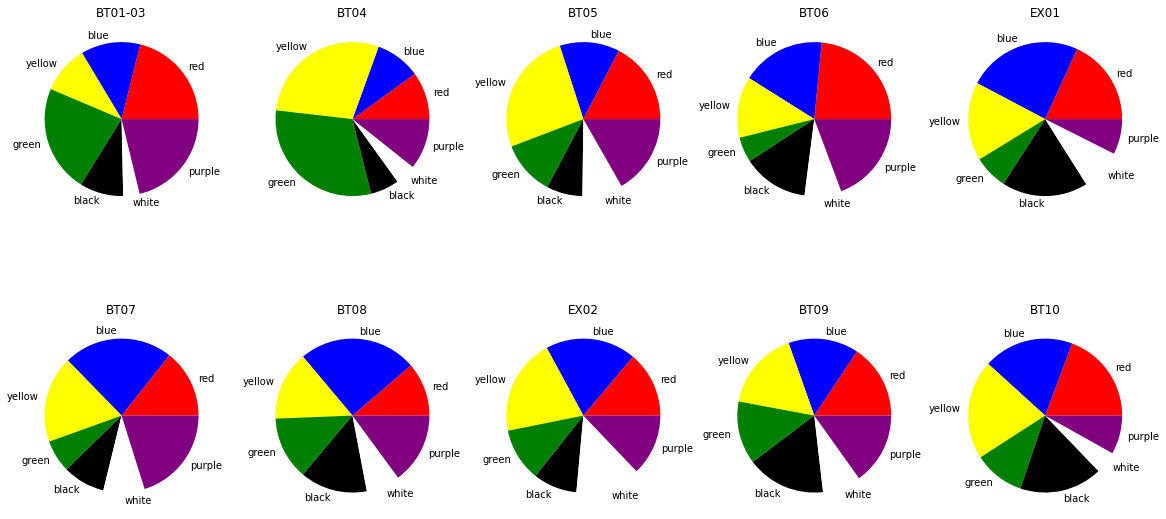

In [215]:
fig, axes = plt.subplots(2,5, figsize=(20,10))

red = [0,0,0,0,0,0,0,0,0,0]
blue = [0,0,0,0,0,0,0,0,0,0]
yellow = [0,0,0,0,0,0,0,0,0,0]
green = [0,0,0,0,0,0,0,0,0,0]
black = [0,0,0,0,0,0,0,0,0,0]
white = [0,0,0,0,0,0,0,0,0,0]
purple = [0,0,0,0,0,0,0,0,0,0]

for card in range (0,len(df_clean['card_name'])):
    for j in range (0,10):
        if 'Red' in df_clean.at[card,'card_color']:
            red[j] = red[j] + df_clean.at[card, 'jp_meta_decks' + str(j+1)]
        if 'Blue' in df_clean.at[card, 'card_color']:
            blue[j] = blue[j] + df_clean.at[card, 'jp_meta_decks'+ str(j+1)]
        if 'Yellow' in df_clean.at[card, 'card_color']:
            yellow[j] = yellow[j] + df_clean.at[card, 'jp_meta_decks'+ str(j+1)]   
        if 'Green' in df_clean.at[card, 'card_color']:
            green[j] = green[j] + df_clean.at[card, 'jp_meta_decks'+ str(j+1)]
        if 'Black' in df_clean.at[card, 'card_color']:
            black[j] = black[j] + df_clean.at[card, 'jp_meta_decks'+ str(j+1)]
        if 'White' in df_clean.at[card, 'card_color']:
            white[j] = white[j] + df_clean.at[card, 'jp_meta_decks'+ str(j+1)]
        if 'Purple' in df_clean.at[card, 'card_color']:
            purple[j] = purple[j] + df_clean.at[card, 'jp_meta_decks'+ str(j+1)]
        
jp_meta_colors = []

for j in range (0,10):
    jp_meta_colors.append(pd.Series([red[j], blue[j], yellow[j], green[j], black[j], white[j], purple[j]], index=['red','blue','yellow', 
                                                                                                    'green','black','white', 
                                                                                                    'purple']))
colors = ['red','blue','yellow','green','black','white','purple']
titles = ['BT01-03','BT04','BT05','BT06','EX01','BT07','BT08','EX02','BT09','BT10']
for j in range (0,5):
    jp_meta_colors[j].plot(ylabel = ' ', kind = 'pie', ax = axes[0][j], colors=colors , title = titles[j])
    jp_meta_colors[j+5].plot(ylabel = ' ', kind = 'pie', ax = axes[1][j], colors=colors , title = titles[j+5])

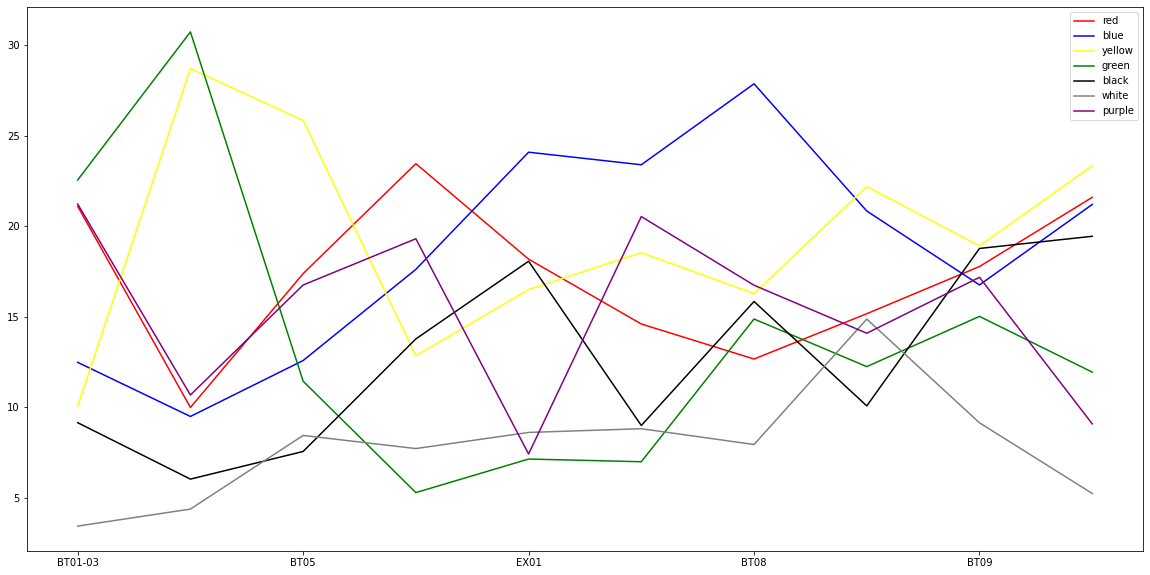

In [216]:
colors = ['red','blue','yellow','green','black','grey','purple']
fig, axes = plt.subplots(1,1, figsize=(20,10))
df = pd.DataFrame({
    'red':red,
    'blue':blue,
    'yellow':yellow,
    'green':green,
    'black':black,
    'white':white,
    'purple':purple
   }, index = titles)
lines = df.plot.line(color=colors,ax = axes)

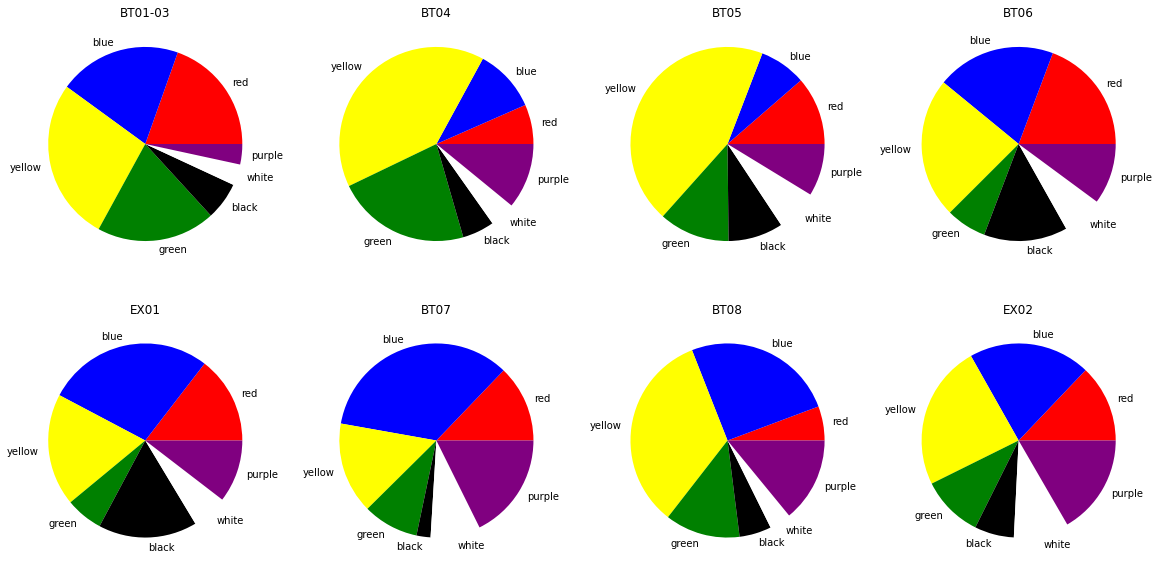

In [217]:
fig, axes = plt.subplots(2,4, figsize=(20,10))

red = [0,0,0,0,0,0,0,0]
blue = [0,0,0,0,0,0,0,0]
yellow = [0,0,0,0,0,0,0,0]
green = [0,0,0,0,0,0,0,0]
black = [0,0,0,0,0,0,0,0]
white = [0,0,0,0,0,0,0,0]
purple = [0,0,0,0,0,0,0,0]

for card in range (0,len(df_clean['card_name'])):
    for j in range (0,8):
        if type(df_clean.at[card, 'west_meta_decks' + str(j+1)]) == str:
            print(df_clean.at[card, 'west_meta_decks' + str(j+1)])
            continue
        if 'Red' in df_clean.at[card,'card_color']:
                red[j] = red[j] + df_clean.at[card, 'west_meta_decks' + str(j+1)]
        if 'Blue' in df_clean.at[card, 'card_color']:
            blue[j] = blue[j] + df_clean.at[card, 'west_meta_decks'+ str(j+1)]
        if 'Yellow' in df_clean.at[card, 'card_color']:
            yellow[j] = yellow[j] + df_clean.at[card, 'west_meta_decks'+ str(j+1)]   
        if 'Green' in df_clean.at[card, 'card_color']:
            green[j] = green[j] + df_clean.at[card, 'west_meta_decks'+ str(j+1)]
        if 'Black' in df_clean.at[card, 'card_color']:
            black[j] = black[j] + df_clean.at[card, 'west_meta_decks'+ str(j+1)]
        if 'White' in df_clean.at[card, 'card_color']:
            white[j] = white[j] + df_clean.at[card, 'west_meta_decks'+ str(j+1)]
        if 'Purple' in df_clean.at[card, 'card_color']:
            purple[j] = purple[j] + df_clean.at[card, 'west_meta_decks'+ str(j+1)]
        
west_meta_colors = []

for j in range (0,8):
    west_meta_colors.append(pd.Series([red[j], blue[j], yellow[j], green[j], black[j], white[j], purple[j]], index=['red','blue','yellow', 
                                                                                                    'green','black','white', 
                                                                                                    'purple']))
colors = ['red','blue','yellow','green','black','white','purple']
titles = ['BT01-03','BT04','BT05','BT06','EX01','BT07','BT08','EX02']
for j in range (0,4):
    west_meta_colors[j].plot(ylabel = ' ', kind = 'pie', ax = axes[0][j], colors=colors , title = titles[j])
    west_meta_colors[j+4].plot(ylabel = ' ', kind = 'pie', ax = axes[1][j], colors=colors , title = titles[j+4])

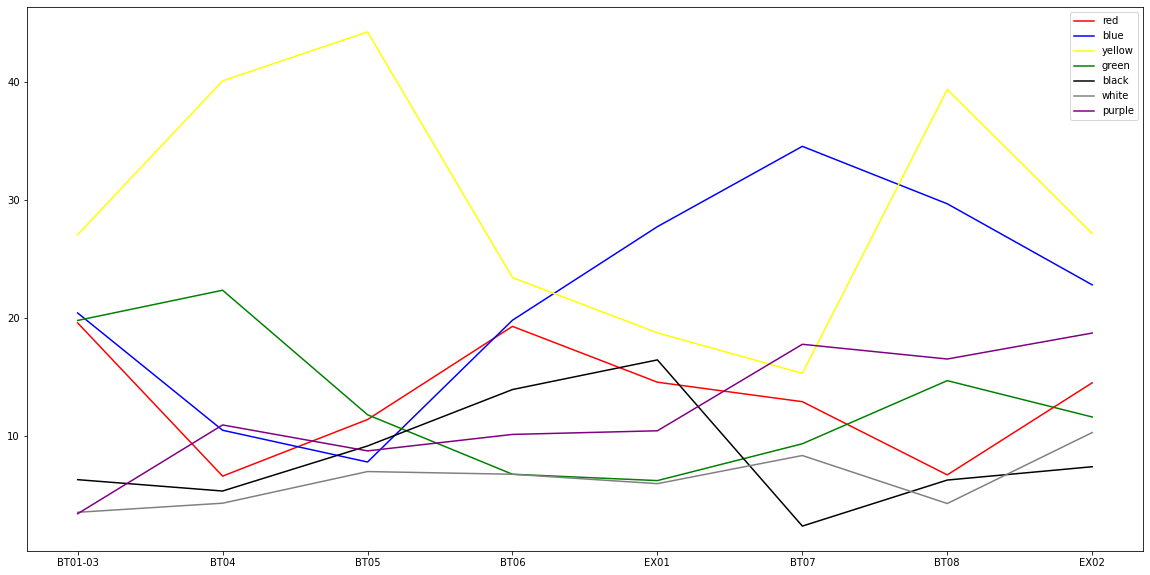

In [218]:
colors = ['red','blue','yellow','green','black','grey','purple']
fig, axes = plt.subplots(1,1, figsize=(20,10))
df = pd.DataFrame({
    'red':red,
    'blue':blue,
    'yellow':yellow,
    'green':green,
    'black':black,
    'white':white,
    'purple':purple
   }, index = titles)
lines = df.plot.line(color=colors,ax = axes)

As we can see the most played colors in each meta is for the most part different.
While there are similaritys in which color is more likely to be at the bottom and which is not the order between japan and
the west is very different.
Also we can see how in the west the yellow color is more dominent while in japan it is not as dominent.

Now lets see similaritys in the cards themselfs

In [219]:
sets = ['BT1-3','BT4', 'BT5' ,'BT6' , 'EX1', 'BT7', 'BT8', 'EX2', 'BT9', 'BT10']
colors = ['red','blue','yellow','green','black','white', 'purple']
for j in range(1, 11):
    card_red = df_clean.iloc[4]
    card_yellow = df_clean.iloc[4]
    card_blue = df_clean.iloc[4]
    card_green = df_clean.iloc[4]
    card_black = df_clean.iloc[4]
    card_purple = df_clean.iloc[4]
    card_white = df_clean.iloc[4]


    for i in range (0,len(df_clean['card_name'])):
        if 'Red' in df_clean.at[i,'card_color'] and card_red['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_red = df_clean.iloc[i]
        if 'Blue' in df_clean.at[i, 'card_color'] and card_blue['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_blue = df_clean.iloc[i]
        if 'Yellow' in df_clean.at[i, 'card_color'] and card_yellow['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_yellow = df_clean.iloc[i]
        if 'Green' in df_clean.at[i, 'card_color'] and card_green['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_green = df_clean.iloc[i]
        if 'Black' in df_clean.at[i, 'card_color'] and card_black['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_black = df_clean.iloc[i]
        if 'White' in df_clean.at[i, 'card_color'] and card_white['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_white = df_clean.iloc[i]
        if 'Purple' in df_clean.at[i, 'card_color'] and card_purple['jp_meta_decks' + str(j)] < df_clean.at[i,'jp_meta_decks' + str(j)]:
            card_purple = df_clean.iloc[i]
    print('Japan ' + sets[j-1] + ':')        
    print(colors[0] +': ',card_red['card_name'], card_red['card_code'])
    print(colors[1] +': ',card_blue['card_name'], card_blue['card_code'])
    print(colors[2] +': ',card_yellow['card_name'],card_yellow['card_code'])
    print(colors[3] +': ',card_green['card_name'],card_green['card_code'])
    print(colors[4] +': ',card_black['card_name'],card_black['card_code'])
    print(colors[5] +': ',card_white['card_name'],card_white['card_code'])
    print(colors[6] +': ',card_purple['card_name'],card_purple['card_code'])
    print('\n')

Japan BT1-3:
red:  Agumon ST1-03
blue:  Elecmon BT1-028
yellow:  Takaishi Takeru BT1-087
green:  Goburimon BT1-064
black:  Bryweludramon BT3-072
white:  Omegamon BT1-084
purple:  Devimon BT2-074


Japan BT4:
red:  Gaia Force ST1-16
blue:  V-mon BT3-021
yellow:  Takaishi Takeru BT1-087
green:  Goburimon BT1-064
black:  Dark Tyranomon ST5-08
white:  Chaosmon: Valdur Arm BT4-091
purple:  Bakumon BT2-070


Japan BT5:
red:  Gaia Force ST1-16
blue:  Motomiya Daisuke BT3-093
yellow:  Takaishi Takeru BT1-087
green:  Blossomon BT3-054
black:  Ultimate Flare BT5-105
white:  Yagami Taichi & Ishida Yamato BT5-093
purple:  Devimon ST6-08


Japan BT6:
red:  Hackmon BT6-009
blue:  Gabumon BT1-029
yellow:  Breath of Wyvern BT6-101
green:  Goburimon BT1-064
black:  Gewaltschwärmer BT6-105
white:  Omegamon Zwart Defeat BT5-112
purple:  Beel Starmon BT6-112


Japan EX1:
red:  Atomic Blaster ST7-12
blue:  Motomiya Daisuke BT3-093
yellow:  Plotmon BT2-034
green:  Kabuterimon ST4-08
black:  Mechanorimon BT5

In [220]:
for j in range(1, 9):
    card_red = df_clean.iloc[4]
    card_red.append(df_clean.iloc[4])
    card_yellow = df_clean.iloc[4]
    card_blue = df_clean.iloc[4]
    card_green = df_clean.iloc[4]
    card_black = df_clean.iloc[4]
    card_purple = df_clean.iloc[4]
    card_white = df_clean.iloc[4]
    
    for i in range (0,len(df_clean['card_name'])):
        if 'Red' in df_clean.at[i,'card_color'] and card_red['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_red = df_clean.iloc[i]
        if 'Blue' in df_clean.at[i, 'card_color'] and card_blue['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_blue = df_clean.iloc[i]
        if 'Yellow' in df_clean.at[i, 'card_color'] and card_yellow['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_yellow = df_clean.iloc[i]
        if 'Green' in df_clean.at[i, 'card_color'] and card_green['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_green = df_clean.iloc[i]
        if 'Black' in df_clean.at[i, 'card_color'] and card_black['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_black = df_clean.iloc[i]
        if 'White' in df_clean.at[i, 'card_color'] and card_white['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_white = df_clean.iloc[i]
        if 'Purple' in df_clean.at[i, 'card_color'] and card_purple['west_meta_decks' + str(j)] < df_clean.at[i,'west_meta_decks' + str(j)]:
            card_purple = df_clean.iloc[i]
    print('West ' + sets[j-1] + ':')        
    print(colors[0] +': ',card_red['card_name'], card_red['card_code'], card_red['card_rarity'])
    print(colors[1] +': ',card_blue['card_name'], card_blue['card_code'], card_blue['card_rarity'])
    print(colors[2] +': ',card_yellow['card_name'],card_yellow['card_code'], card_yellow['card_rarity'])
    print(colors[3] +': ',card_green['card_name'],card_green['card_code'], card_green['card_rarity'])
    print(colors[4] +': ',card_black['card_name'],card_black['card_code'], card_black['card_rarity'])
    print(colors[5] +': ',card_white['card_name'],card_white['card_code'], card_white['card_rarity'])
    print(colors[6] +': ',card_purple['card_name'],card_purple['card_code'], card_purple['card_rarity'])
    print('\n')

West BT1-3:
red:  Gaia Force ST1-16 Uncommon
blue:  V-mon BT3-021 Rare
yellow:  Upamon BT3-003 Uncommon
green:  Agumon BT2-043 Common
black:  Bryweludramon BT3-072 Rare
white:  Omegamon BT1-084 Super Rare
purple:  Impmon BT2-068 Common


West BT4:
red:  Gaia Force ST1-16 Uncommon
blue:  V-mon BT3-021 Rare
yellow:  Takaishi Takeru BT1-087 Rare
green:  Kabuterimon ST4-08 Uncommon
black:  Izumi Koshiro BT4-096 Rare
white:  Chaosmon: Valdur Arm BT4-091 Super Rare
purple:  Peti Meramon BT3-006 Uncommon


West BT5:
red:  Gaia Force ST1-16 Uncommon
blue:  Hammer Spark ST2-13 Common
yellow:  Starmons BT5-035 Common
green:  Kabuterimon ST4-08 Uncommon
black:  Ultimate Flare BT5-105 Common
white:  Chaosmon: Valdur Arm BT4-091 Super Rare
purple:  Devimon ST6-08 Uncommon


West BT6:
red:  Gaia Force ST1-16 Uncommon
blue:  Coredramon ST8-06 Uncommon
yellow:  Holydramon BT2-039 Uncommon
green:  Kabuterimon ST4-08 Uncommon
black:  Ultimate Flare BT5-105 Common
white:  Omegamon Zwart Defeat BT5-112 Se

Once again we see big differances between east and west. while there are some similiar cards pop here and there for the most
part the meta looks vastly different

Lets try and look at more then only the most played card at each color.
this time we will look at the top 3 and only on the mega digimon which are usually the cards that decks are built around

In [221]:
colors = ['Red','Blue','Yellow','Green','Black','White', 'Purple']
for c in colors:
    df_chk = df_clean[df_clean['card_color'].str.contains(c)]
    df_chk2 = df_chk[df_chk['card_type'].str.contains('Digimon')]
    df_chk3 = df_chk2[df_chk2['digimon_form'].str.contains('Mega')]
    for n in range (0,7):
        print(c + ' ' + sets[n])
        print('japan:')
        to_print = df_chk3.nlargest(3,'jp_meta_decks' + str(n+1))
        display(to_print)
        print('west:')
        to_print = df_chk3.nlargest(3,'west_meta_decks' + str(n+1))
        display(to_print)

Red BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
430,BT3-018,Blitz Greymon,Red,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,12000.0,...,1.299820,0.345041,0.228247,0.03225,0.0,0.000000,0.0,0.0,0.0,0.0
9,ST1-10,Hououmon,Red,Rare,Digimon,6.0,Mega,Holy Beast,10.0,12000.0,...,1.228007,0.212333,0.089916,0.03870,0.0,0.000000,0.0,0.0,0.0,0.0
168,BT2-018,Volcanicdramon,Red,Common,Digimon,6.0,Mega,Earth Dragon,11.0,10000.0,...,0.847397,0.203486,0.186748,0.01290,0.0,0.005937,0.0,0.0,0.0,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
168,BT2-018,Volcanicdramon,Red,Common,Digimon,6.0,Mega,Earth Dragon,11.0,10000.0,...,0.847397,0.203486,0.186748,0.0129,0.0,0.005937,0.0,0.000000,0.0,0.0
431,BT3-019,Ragna Lordmon,Red,Super Rare,Digimon,7.0,Mega,Unique/Legend-Arms,14.0,14000.0,...,0.581688,0.309652,0.055333,0.0129,0.0,0.017810,0.0,0.037155,0.0,0.0
428,BT3-016,Durandamon,Red,Rare,Digimon,6.0,Mega,Holy Sword/Legend-Arms,10.0,12000.0,...,0.430880,0.247722,0.179831,0.0000,0.0,0.005937,0.0,0.000000,0.0,0.0


Red BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
430,BT3-018,Blitz Greymon,Red,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,12000.0,...,1.299820,0.345041,0.228247,0.03225,0.0,0.000000,0.0,0.000000,0.0,0.0
431,BT3-019,Ragna Lordmon,Red,Super Rare,Digimon,7.0,Mega,Unique/Legend-Arms,14.0,14000.0,...,0.581688,0.309652,0.055333,0.01290,0.0,0.017810,0.0,0.037155,0.0,0.0
428,BT3-016,Durandamon,Red,Rare,Digimon,6.0,Mega,Holy Sword/Legend-Arms,10.0,12000.0,...,0.430880,0.247722,0.179831,0.00000,0.0,0.005937,0.0,0.000000,0.0,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
431,BT3-019,Ragna Lordmon,Red,Super Rare,Digimon,7.0,Mega,Unique/Legend-Arms,14.0,14000.0,...,0.581688,0.309652,0.055333,0.01290,0.0,0.017810,0.0,0.037155,0.0,0.0
428,BT3-016,Durandamon,Red,Rare,Digimon,6.0,Mega,Holy Sword/Legend-Arms,10.0,12000.0,...,0.430880,0.247722,0.179831,0.00000,0.0,0.005937,0.0,0.000000,0.0,0.0
430,BT3-018,Blitz Greymon,Red,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,12000.0,...,1.299820,0.345041,0.228247,0.03225,0.0,0.000000,0.0,0.000000,0.0,0.0


Red BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
652,BT5-017,Zeke Greymon,Red,Uncommon,Digimon,6.0,Mega,Cyborg,12.0,11000.0,...,0.00000,0.000000,0.546410,0.122549,0.0,0.0,0.0,0.014862,0.019675,0.0
654,BT5-019,Shoutmon DX,Red,Super Rare,Digimon,6.0,Mega,Composition,13.0,12000.0,...,0.00000,0.000000,0.491078,0.141899,0.0,0.0,0.0,0.029724,0.026233,0.0
430,BT3-018,Blitz Greymon,Red,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,12000.0,...,1.29982,0.345041,0.228247,0.032250,0.0,0.0,0.0,0.000000,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
652,BT5-017,Zeke Greymon,Red,Uncommon,Digimon,6.0,Mega,Cyborg,12.0,11000.0,...,0.000000,0.000000,0.546410,0.122549,0.0,0.000000,0.000000,0.014862,0.019675,0.000000
654,BT5-019,Shoutmon DX,Red,Super Rare,Digimon,6.0,Mega,Composition,13.0,12000.0,...,0.000000,0.000000,0.491078,0.141899,0.0,0.000000,0.000000,0.029724,0.026233,0.000000
167,BT1-025,War Greymon,Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.057451,0.008847,0.062249,0.045150,0.0,0.035621,0.069077,0.037155,0.098374,0.047074


Red BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.000000,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.0
765,BT6-018,Agumon -Yuki no Kizuna-,Red,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.0,0.000000,0.483746,0.396733,0.059368,0.000000,0.096604,0.000000,0.0
107,ST7-09,Dukemon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.110665,0.174149,0.070012,0.041558,0.000000,0.104035,0.144281,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.000000,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.0
765,BT6-018,Agumon -Yuki no Kizuna-,Red,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.0,0.000000,0.483746,0.396733,0.059368,0.000000,0.096604,0.000000,0.0
107,ST7-09,Dukemon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.110665,0.174149,0.070012,0.041558,0.000000,0.104035,0.144281,0.0


Red EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.0,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.0
765,BT6-018,Agumon -Yuki no Kizuna-,Red,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.0,0.0,0.483746,0.396733,0.059368,0.000000,0.096604,0.000000,0.0
614,BT4-113,Ancient Greymon,Red,Secret Rare,Digimon,6.0,Mega,Ancient Dragon/Ten Warriors,12.0,13000.0,...,0.0,0.0,0.0,0.038700,0.186698,0.409641,0.092102,0.029724,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
765,BT6-018,Agumon -Yuki no Kizuna-,Red,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.000000,0.000000,0.000000,0.483746,0.396733,0.059368,0.000000,0.096604,0.000000,0.000000
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.000000,0.000000,0.000000,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.000000
167,BT1-025,War Greymon,Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.057451,0.008847,0.062249,0.045150,0.000000,0.035621,0.069077,0.037155,0.098374,0.047074


Red BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.0,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.0
614,BT4-113,Ancient Greymon,Red,Secret Rare,Digimon,6.0,Mega,Ancient Dragon/Ten Warriors,12.0,13000.0,...,0.0,0.0,0.0,0.038700,0.186698,0.409641,0.092102,0.029724,0.000000,0.0
876,BT7-017,Chaosdramon,Red,Rare,Digimon,6.0,Mega,Machine,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.154358,0.000000,0.000000,0.019675,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.0,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.0
614,BT4-113,Ancient Greymon,Red,Secret Rare,Digimon,6.0,Mega,Ancient Dragon/Ten Warriors,12.0,13000.0,...,0.0,0.0,0.0,0.038700,0.186698,0.409641,0.092102,0.029724,0.000000,0.0
876,BT7-017,Chaosdramon,Red,Rare,Digimon,6.0,Mega,Machine,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.154358,0.000000,0.000000,0.019675,0.0


Red BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
763,BT6-016,Jesmon,Red,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,11.0,11000.0,...,0.0,0.0,0.0,1.031992,0.793466,0.504631,0.552613,0.401278,0.072141,0.000000
1041,BT8-070,Black War Greymon,Black/Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.552613,0.312105,0.341028,0.047074
614,BT4-113,Ancient Greymon,Red,Secret Rare,Digimon,6.0,Mega,Ancient Dragon/Ten Warriors,12.0,13000.0,...,0.0,0.0,0.0,0.038700,0.186698,0.409641,0.092102,0.029724,0.000000,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1041,BT8-070,Black War Greymon,Black/Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,12000.0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.552613,0.312105,0.341028,0.047074
874,BT7-015,Avenge Kidmon,Red,Uncommon,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.047495,0.092102,0.044586,0.039349,0.078456
167,BT1-025,War Greymon,Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.057451,0.008847,0.062249,0.04515,0.0,0.035621,0.069077,0.037155,0.098374,0.047074


Blue BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
443,BT3-031,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.524237,0.389277,0.159081,0.0516,0.140023,0.053431,0.092102,0.022293,0.032791,0.0
25,ST2-10,Plesiomon,Blue,Rare,Digimon,6.0,Mega,Plesiosaur,10.0,12000.0,...,0.136445,0.035389,0.041500,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
238,BT1-044,Metal Garurumon,Blue,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,11000.0,...,0.093357,0.088472,0.076082,0.0258,0.000000,0.000000,0.000000,0.014862,0.039349,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
443,BT3-031,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.524237,0.389277,0.159081,0.0516,0.140023,0.053431,0.092102,0.022293,0.032791,0.0
334,BT2-032,Ulforce V-dramon,Blue,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.028725,0.000000,0.172915,0.0258,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
238,BT1-044,Metal Garurumon,Blue,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,11000.0,...,0.093357,0.088472,0.076082,0.0258,0.000000,0.000000,0.000000,0.014862,0.039349,0.0


Blue BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
443,BT3-031,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.524237,0.389277,0.159081,0.0516,0.140023,0.053431,0.092102,0.022293,0.032791,0.0
238,BT1-044,Metal Garurumon,Blue,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,11000.0,...,0.093357,0.088472,0.076082,0.0258,0.000000,0.000000,0.000000,0.014862,0.039349,0.0
555,BT4-033,Z'd Garurumon,Blue,Rare,Digimon,6.0,Mega,Cyborg,11.0,12000.0,...,0.000000,0.070778,0.089916,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
443,BT3-031,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.524237,0.389277,0.159081,0.051600,0.140023,0.053431,0.092102,0.022293,0.032791,0.0
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.000000,0.008847,0.214414,0.483746,0.280047,0.261221,0.000000,0.022293,0.000000,0.0
555,BT4-033,Z'd Garurumon,Blue,Rare,Digimon,6.0,Mega,Cyborg,11.0,12000.0,...,0.000000,0.070778,0.089916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Blue BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
667,BT5-032,Hexeblaumon,Blue,Super Rare,Digimon,6.0,Mega,Magic Knight,12.0,11000.0,...,0.000000,0.000000,0.255914,0.141899,0.163361,0.160294,0.0,0.029724,0.0,0.062765
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.000000,0.008847,0.214414,0.483746,0.280047,0.261221,0.0,0.022293,0.0,0.000000
334,BT2-032,Ulforce V-dramon,Blue,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.028725,0.000000,0.172915,0.025800,0.000000,0.000000,0.0,0.000000,0.0,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
443,BT3-031,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.524237,0.389277,0.159081,0.051600,0.140023,0.053431,0.092102,0.022293,0.032791,0.000000
667,BT5-032,Hexeblaumon,Blue,Super Rare,Digimon,6.0,Mega,Magic Knight,12.0,11000.0,...,0.000000,0.000000,0.255914,0.141899,0.163361,0.160294,0.000000,0.029724,0.000000,0.062765
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.000000,0.008847,0.214414,0.483746,0.280047,0.261221,0.000000,0.022293,0.000000,0.000000


Blue BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
777,BT6-030,Gabumon -Yujo no Kizuna-,Blue,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.000000,0.027666,1.006192,1.190198,0.326526,0.20723,0.178346,0.026233,0.000000
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.0,0.008847,0.214414,0.483746,0.280047,0.261221,0.00000,0.022293,0.000000,0.000000
667,BT5-032,Hexeblaumon,Blue,Super Rare,Digimon,6.0,Mega,Magic Knight,12.0,11000.0,...,0.0,0.000000,0.255914,0.141899,0.163361,0.160294,0.00000,0.029724,0.000000,0.062765


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
777,BT6-030,Gabumon -Yujo no Kizuna-,Blue,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.000000,0.000000,0.027666,1.006192,1.190198,0.326526,0.207230,0.178346,0.026233,0.0
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.000000,0.008847,0.214414,0.483746,0.280047,0.261221,0.000000,0.022293,0.000000,0.0
443,BT3-031,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.524237,0.389277,0.159081,0.051600,0.140023,0.053431,0.092102,0.022293,0.032791,0.0


Blue EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
777,BT6-030,Gabumon -Yujo no Kizuna-,Blue,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.000000,0.027666,1.006192,1.190198,0.326526,0.207230,0.178346,0.026233,0.0
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.0,0.008847,0.214414,0.483746,0.280047,0.261221,0.000000,0.022293,0.000000,0.0
1329,EX1-022,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,12.0,11000.0,...,0.0,0.000000,0.000000,0.000000,0.233372,0.059368,0.230256,0.014862,0.006558,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
777,BT6-030,Gabumon -Yujo no Kizuna-,Blue,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.000000,0.027666,1.006192,1.190198,0.326526,0.20723,0.178346,0.026233,0.000000
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.0,0.008847,0.214414,0.483746,0.280047,0.261221,0.00000,0.022293,0.000000,0.000000
667,BT5-032,Hexeblaumon,Blue,Super Rare,Digimon,6.0,Mega,Magic Knight,12.0,11000.0,...,0.0,0.000000,0.255914,0.141899,0.163361,0.160294,0.00000,0.029724,0.000000,0.062765


Blue BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
777,BT6-030,Gabumon -Yujo no Kizuna-,Blue,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.000000,0.027666,1.006192,1.190198,0.326526,0.20723,0.178346,0.026233,0.000000
615,BT4-114,Ancient Garurumon,Blue,Secret Rare,Digimon,6.0,Mega,Ancient Animal/Ten Warriors,12.0,13000.0,...,0.0,0.008847,0.214414,0.483746,0.280047,0.261221,0.00000,0.022293,0.000000,0.000000
667,BT5-032,Hexeblaumon,Blue,Super Rare,Digimon,6.0,Mega,Magic Knight,12.0,11000.0,...,0.0,0.000000,0.255914,0.141899,0.163361,0.160294,0.00000,0.029724,0.000000,0.062765


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
776,BT6-029,Qinglongmon,Blue,Super Rare,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons/Four Sovereigns,13.0,13000.0,...,0.0,0.0,0.000000,0.096749,0.046674,0.130610,0.046051,0.059449,0.000000,0.015691
777,BT6-030,Gabumon -Yujo no Kizuna-,Blue,Super Rare,Digimon,7.0,Mega,Unknown,14.0,14000.0,...,0.0,0.0,0.027666,1.006192,1.190198,0.326526,0.207230,0.178346,0.026233,0.000000
667,BT5-032,Hexeblaumon,Blue,Super Rare,Digimon,6.0,Mega,Magic Knight,12.0,11000.0,...,0.0,0.0,0.255914,0.141899,0.163361,0.160294,0.000000,0.029724,0.000000,0.062765


Blue BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1003,BT8-032,Imperialdramon: Fighter Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragonkin,12.0,13000.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.690767,0.386416,0.177072,0.047074
131,ST9-06,Imperialdramon: Dragon Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.0,0.0,0.0,0.0,0.000000,0.053431,0.644716,0.423571,0.183631,0.062765
1329,EX1-022,Imperialdramon: Dragon Mode,Blue,Super Rare,Digimon,6.0,Mega,Ancient Dragon,12.0,11000.0,...,0.0,0.0,0.0,0.0,0.233372,0.059368,0.230256,0.014862,0.006558,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
131,ST9-06,Imperialdramon: Dragon Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.053431,0.644716,0.423571,0.183631,0.062765
1003,BT8-032,Imperialdramon: Fighter Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragonkin,12.0,13000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.690767,0.386416,0.177072,0.047074
776,BT6-029,Qinglongmon,Blue,Super Rare,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons/Four Sovereigns,13.0,13000.0,...,0.0,0.0,0.0,0.096749,0.046674,0.130610,0.046051,0.059449,0.000000,0.015691


Yellow BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
343,BT2-041,Shine Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Light Dragon,12.0,11000.0,...,0.574506,0.433513,0.290497,0.051600,0.093349,0.391831,0.092102,0.126328,0.150839,0.000000
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.000000,0.066880,0.026233,0.000000
455,BT3-043,Sleipmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,12.0,11000.0,...,0.136445,0.106167,0.041500,0.000000,0.000000,0.000000,0.000000,0.007431,0.000000,0.015691


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
343,BT2-041,Shine Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Light Dragon,12.0,11000.0,...,0.574506,0.433513,0.290497,0.051600,0.093349,0.391831,0.092102,0.126328,0.150839,0.0
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.000000,0.066880,0.026233,0.0
256,BT1-062,Slash Angemon,Yellow,Uncommon,Digimon,6.0,Mega,Authority,11.0,8000.0,...,0.064632,0.999735,0.781574,0.103199,0.093349,0.029684,0.000000,0.000000,0.000000,0.0


Yellow BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
570,BT4-048,War Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.000000,1.424401,0.428828,0.245098,0.256709,0.053431,0.0,0.014862,0.045908,0.0
256,BT1-062,Slash Angemon,Yellow,Uncommon,Digimon,6.0,Mega,Authority,11.0,8000.0,...,0.064632,0.999735,0.781574,0.103199,0.093349,0.029684,0.0,0.000000,0.000000,0.0
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
570,BT4-048,War Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.000000,1.424401,0.428828,0.245098,0.256709,0.053431,0.0,0.014862,0.045908,0.0
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.0
256,BT1-062,Slash Angemon,Yellow,Uncommon,Digimon,6.0,Mega,Authority,11.0,8000.0,...,0.064632,0.999735,0.781574,0.103199,0.093349,0.029684,0.0,0.000000,0.000000,0.0


Yellow BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
680,BT5-045,Lord Knightmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.000000,0.000000,1.300318,0.270898,0.373396,0.172168,0.0,0.118897,0.026233,0.0
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.0
256,BT1-062,Slash Angemon,Yellow,Uncommon,Digimon,6.0,Mega,Authority,11.0,8000.0,...,0.064632,0.999735,0.781574,0.103199,0.093349,0.029684,0.0,0.000000,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
680,BT5-045,Lord Knightmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.000000,0.000000,1.300318,0.270898,0.373396,0.172168,0.0,0.118897,0.026233,0.0
256,BT1-062,Slash Angemon,Yellow,Uncommon,Digimon,6.0,Mega,Authority,11.0,8000.0,...,0.064632,0.999735,0.781574,0.103199,0.093349,0.029684,0.0,0.000000,0.000000,0.0
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.0


Yellow BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.0
680,BT5-045,Lord Knightmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.000000,0.000000,1.300318,0.270898,0.373396,0.172168,0.0,0.118897,0.026233,0.0
570,BT4-048,War Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,11000.0,...,0.000000,1.424401,0.428828,0.245098,0.256709,0.053431,0.0,0.014862,0.045908,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.000000
680,BT5-045,Lord Knightmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.000000,0.000000,1.300318,0.270898,0.373396,0.172168,0.0,0.118897,0.026233,0.000000
679,BT5-044,Sakuyamon,Yellow,Rare,Digimon,6.0,Mega,Shaman,12.0,11000.0,...,0.000000,0.000000,0.041500,0.154799,0.303384,0.065305,0.0,0.000000,0.177072,0.047074


Yellow EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.000000
680,BT5-045,Lord Knightmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.000000,0.000000,1.300318,0.270898,0.373396,0.172168,0.0,0.118897,0.026233,0.000000
679,BT5-044,Sakuyamon,Yellow,Rare,Digimon,6.0,Mega,Shaman,12.0,11000.0,...,0.000000,0.000000,0.041500,0.154799,0.303384,0.065305,0.0,0.000000,0.177072,0.047074


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
341,BT2-039,Holydramon,Yellow,Uncommon,Digimon,6.0,Mega,Holy Dragon/Four Great Dragons,11.0,10000.0,...,0.287253,0.884721,0.850740,0.735294,0.513419,0.112800,0.0,0.066880,0.026233,0.000000
679,BT5-044,Sakuyamon,Yellow,Rare,Digimon,6.0,Mega,Shaman,12.0,11000.0,...,0.000000,0.000000,0.041500,0.154799,0.303384,0.065305,0.0,0.000000,0.177072,0.047074
680,BT5-045,Lord Knightmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,11000.0,...,0.000000,0.000000,1.300318,0.270898,0.373396,0.172168,0.0,0.118897,0.026233,0.000000


Yellow BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
147,ST10-06,Mastemon,Yellow/Purple,Super Rare,Digimon,6.0,Mega,Angel,13.0,13000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.504631,0.552613,0.393847,0.380378,0.12553
791,BT6-044,Dynasmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,12.0,12000.0,...,0.000000,0.000000,0.000000,0.116099,0.280047,0.397768,0.161179,0.014862,0.000000,0.00000
343,BT2-041,Shine Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Light Dragon,12.0,11000.0,...,0.574506,0.433513,0.290497,0.051600,0.093349,0.391831,0.092102,0.126328,0.150839,0.00000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
343,BT2-041,Shine Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Light Dragon,12.0,11000.0,...,0.574506,0.433513,0.290497,0.051600,0.093349,0.391831,0.092102,0.126328,0.150839,0.0
791,BT6-044,Dynasmon,Yellow,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,12.0,12000.0,...,0.000000,0.000000,0.000000,0.116099,0.280047,0.397768,0.161179,0.014862,0.000000,0.0
257,BT1-063,Seraphimon,Yellow,Super Rare,Digimon,6.0,Mega,Seraph/Three Great Angels,12.0,10000.0,...,0.114901,0.221180,0.138332,0.070949,0.000000,0.053431,0.207230,0.297243,0.065582,0.0


Yellow BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
147,ST10-06,Mastemon,Yellow/Purple,Super Rare,Digimon,6.0,Mega,Angel,13.0,13000.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.504631,0.552613,0.393847,0.380378,0.125530
1053,BT8-082,Ofanimon: Falldown Mode,Purple/Yellow,Super Rare,Digimon,6.0,Mega,Fallen Angel,12.0,12000.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.253281,0.408709,0.426285,0.188294
257,BT1-063,Seraphimon,Yellow,Super Rare,Digimon,6.0,Mega,Seraph/Three Great Angels,12.0,10000.0,...,0.114901,0.22118,0.138332,0.070949,0.0,0.053431,0.207230,0.297243,0.065582,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1053,BT8-082,Ofanimon: Falldown Mode,Purple/Yellow,Super Rare,Digimon,6.0,Mega,Fallen Angel,12.0,12000.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.253281,0.408709,0.426285,0.188294
147,ST10-06,Mastemon,Yellow/Purple,Super Rare,Digimon,6.0,Mega,Angel,13.0,13000.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.504631,0.552613,0.393847,0.380378,0.125530
343,BT2-041,Shine Greymon,Yellow,Super Rare,Digimon,6.0,Mega,Light Dragon,12.0,11000.0,...,0.574506,0.433513,0.290497,0.0516,0.093349,0.391831,0.092102,0.126328,0.150839,0.000000


Green BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
468,BT3-056,Ceresmon,Green,Super Rare,Digimon,6.0,Mega,Shaman/Olympos XII,12.0,12000.0,...,0.710952,0.176944,0.076082,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.000000,0.000000,0.0,0.0
469,BT3-057,Saint Galgomon,Green,Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.624776,0.539680,0.186748,0.064499,0.000000,0.017810,0.069077,0.052018,0.0,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
468,BT3-056,Ceresmon,Green,Super Rare,Digimon,6.0,Mega,Shaman/Olympos XII,12.0,12000.0,...,0.710952,0.176944,0.076082,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.0,0.000000,0.0,0.0
470,BT3-058,Bancho Stingmon,Green,Uncommon,Digimon,6.0,Mega,Insectoid/Boss,12.0,9000.0,...,0.402154,0.283111,0.172915,0.051600,0.023337,0.000000,0.0,0.014862,0.0,0.0


Green BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.000000,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.0
60,ST4-13,Herakle Kabuterimon,Green,Super Rare,Digimon,6.0,Mega,Insectoid,12.0,12000.0,...,0.359066,1.026276,0.082999,0.012900,0.046674,0.023747,0.000000,0.000000,0.000000,0.0
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.000000,0.000000,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.000000,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.000000
1469,P-025,Gran Kuwagamon,Green,Promo,Digimon,6.0,Mega,Insectoid,11.0,11000.0,...,0.014363,0.097319,0.145248,0.038700,0.070012,0.000000,0.000000,0.126328,0.760756,0.313824
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.000000,0.000000,0.000000,0.000000


Green BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.000000,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.000000
691,BT5-056,Rafflesimon,Green,Super Rare,Digimon,6.0,Mega,Fairy,12.0,11000.0,...,0.000000,0.035389,0.331996,0.122549,0.163361,0.000000,0.046051,0.000000,0.000000,0.047074
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.000000,0.000000,0.000000,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.000000,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.000000
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.000000,0.000000,0.000000,0.000000
691,BT5-056,Rafflesimon,Green,Super Rare,Digimon,6.0,Mega,Fairy,12.0,11000.0,...,0.000000,0.035389,0.331996,0.122549,0.163361,0.000000,0.046051,0.000000,0.000000,0.047074


Green BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.000000,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.0
351,BT2-049,Pinochimon,Green,Rare,Digimon,6.0,Mega,Puppet,11.0,10000.0,...,0.696589,0.672388,0.262830,0.135449,0.093349,0.005937,0.000000,0.000000,0.000000,0.0
801,BT6-054,Ancient Troiamon,Green,Rare,Digimon,6.0,Mega,Ancient Plant/Ten Warriors,13.0,13000.0,...,0.000000,0.000000,0.000000,0.128999,0.140023,0.225600,0.138153,0.044586,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.0,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.000000
691,BT5-056,Rafflesimon,Green,Super Rare,Digimon,6.0,Mega,Fairy,12.0,11000.0,...,0.0,0.035389,0.331996,0.122549,0.163361,0.000000,0.046051,0.000000,0.000000,0.047074
801,BT6-054,Ancient Troiamon,Green,Rare,Digimon,6.0,Mega,Ancient Plant/Ten Warriors,13.0,13000.0,...,0.0,0.000000,0.000000,0.128999,0.140023,0.225600,0.138153,0.044586,0.000000,0.000000


Green EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.0,1.300540,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.000000
691,BT5-056,Rafflesimon,Green,Super Rare,Digimon,6.0,Mega,Fairy,12.0,11000.0,...,0.0,0.035389,0.331996,0.122549,0.163361,0.000000,0.046051,0.000000,0.000000,0.047074
801,BT6-054,Ancient Troiamon,Green,Rare,Digimon,6.0,Mega,Ancient Plant/Ten Warriors,13.0,13000.0,...,0.0,0.000000,0.000000,0.128999,0.140023,0.225600,0.138153,0.044586,0.000000,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.0,1.30054,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.0
801,BT6-054,Ancient Troiamon,Green,Rare,Digimon,6.0,Mega,Ancient Plant/Ten Warriors,13.0,13000.0,...,0.0,0.00000,0.000000,0.128999,0.140023,0.225600,0.138153,0.044586,0.000000,0.0
913,BT7-054,Ancient Beatmon,Green,Rare,Digimon,6.0,Mega,Ancient Insectoid/Ten Warriors,13.0,13000.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.332463,0.069077,0.074311,0.000000,0.0


Green BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
913,BT7-054,Ancient Beatmon,Green,Rare,Digimon,6.0,Mega,Ancient Insectoid/Ten Warriors,13.0,13000.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.332463,0.069077,0.074311,0.000000,0.0
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.0,1.30054,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.0
801,BT6-054,Ancient Troiamon,Green,Rare,Digimon,6.0,Mega,Ancient Plant/Ten Warriors,13.0,13000.0,...,0.0,0.00000,0.000000,0.128999,0.140023,0.225600,0.138153,0.044586,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
913,BT7-054,Ancient Beatmon,Green,Rare,Digimon,6.0,Mega,Ancient Insectoid/Ten Warriors,13.0,13000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.332463,0.069077,0.074311,0.000000,0.0
801,BT6-054,Ancient Troiamon,Green,Rare,Digimon,6.0,Mega,Ancient Plant/Ten Warriors,13.0,13000.0,...,0.0,0.0,0.0,0.128999,0.140023,0.225600,0.138153,0.044586,0.000000,0.0
693,BT5-058,Algomon,Green,Rare,Digimon,6.0,Mega,Mutant,13.0,11000.0,...,0.0,0.0,0.0,0.000000,0.046674,0.029684,0.000000,0.007431,0.026233,0.0


Green BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1003,BT8-032,Imperialdramon: Fighter Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragonkin,12.0,13000.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.690767,0.386416,0.177072,0.047074
131,ST9-06,Imperialdramon: Dragon Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.053431,0.644716,0.423571,0.183631,0.062765
584,BT4-062,Nidhoggmon,Green,Super Rare,Digimon,6.0,Mega,Dark Dragon,13.0,13000.0,...,0.0,1.30054,0.497994,0.187049,0.233372,0.231536,0.230256,0.178346,0.006558,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
131,ST9-06,Imperialdramon: Dragon Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragon,13.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.053431,0.644716,0.423571,0.183631,0.062765
1003,BT8-032,Imperialdramon: Fighter Mode,Blue/Green,Super Rare,Digimon,6.0,Mega,Ancient Dragonkin,12.0,13000.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.690767,0.386416,0.177072,0.047074
1028,BT8-057,Shivamon,Green,Super Rare,Digimon,6.0,Mega,Insectoid,12.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.207230,0.156053,0.045908,0.000000


Black BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
484,BT3-072,Bryweludramon,Black,Rare,Digimon,6.0,Mega,Armor/Legend-Arms,10.0,12000.0,...,0.596050,0.336194,0.283580,0.000000,0.000000,0.023747,0.000000,0.037155,0.0,0.0
485,BT3-073,Cres Garurumon,Black,Super Rare,Digimon,6.0,Mega,Beast Knight,11.0,11000.0,...,0.315978,0.079625,0.034583,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
487,BT3-075,Craniummon,Black,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,12000.0,...,0.215440,0.070778,0.117582,0.406347,0.536756,0.059368,0.023026,0.000000,0.0,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
484,BT3-072,Bryweludramon,Black,Rare,Digimon,6.0,Mega,Armor/Legend-Arms,10.0,12000.0,...,0.596050,0.336194,0.283580,0.00000,0.000000,0.023747,0.0,0.037155,0.0,0.0
368,BT2-066,Mugendramon,Black,Super Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.136445,0.061930,0.297413,0.04515,0.140023,0.000000,0.0,0.014862,0.0,0.0
366,BT2-064,Hi Andromon,Black,Uncommon,Digimon,6.0,Mega,Cyborg,10.0,12000.0,...,0.201077,0.044236,0.200581,0.00000,0.046674,0.000000,0.0,0.000000,0.0,0.0


Black BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
484,BT3-072,Bryweludramon,Black,Rare,Digimon,6.0,Mega,Armor/Legend-Arms,10.0,12000.0,...,0.596050,0.336194,0.283580,0.000000,0.000000,0.023747,0.000000,0.037155,0.000000,0.000000
596,BT4-074,Darkdramon,Black,Rare,Digimon,6.0,Mega,Cyborg/D-Brigade,13.0,11000.0,...,0.000000,0.159250,0.131415,0.187049,0.140023,0.136547,0.000000,0.022293,0.170514,0.000000
1470,P-026,Black War Greymon,Black,Promo,Digimon,6.0,Mega,Dragonkin,11.0,11000.0,...,0.021544,0.115014,0.000000,0.000000,0.000000,0.000000,0.046051,0.081742,0.019675,0.031382


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
484,BT3-072,Bryweludramon,Black,Rare,Digimon,6.0,Mega,Armor/Legend-Arms,10.0,12000.0,...,0.596050,0.336194,0.283580,0.00000,0.000000,0.023747,0.000000,0.037155,0.000000,0.000000
368,BT2-066,Mugendramon,Black,Super Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.136445,0.061930,0.297413,0.04515,0.140023,0.000000,0.000000,0.014862,0.000000,0.000000
1470,P-026,Black War Greymon,Black,Promo,Digimon,6.0,Mega,Dragonkin,11.0,11000.0,...,0.021544,0.115014,0.000000,0.00000,0.000000,0.000000,0.046051,0.081742,0.019675,0.031382


Black BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
368,BT2-066,Mugendramon,Black,Super Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.136445,0.061930,0.297413,0.04515,0.140023,0.000000,0.0,0.014862,0.0,0.0
484,BT3-072,Bryweludramon,Black,Rare,Digimon,6.0,Mega,Armor/Legend-Arms,10.0,12000.0,...,0.596050,0.336194,0.283580,0.00000,0.000000,0.023747,0.0,0.037155,0.0,0.0
366,BT2-064,Hi Andromon,Black,Uncommon,Digimon,6.0,Mega,Cyborg,10.0,12000.0,...,0.201077,0.044236,0.200581,0.00000,0.046674,0.000000,0.0,0.000000,0.0,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
368,BT2-066,Mugendramon,Black,Super Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.136445,0.06193,0.297413,0.045150,0.140023,0.000000,0.000000,0.014862,0.000000,0.0
705,BT5-070,Metal Garurumon,Black,Super Rare,Digimon,6.0,Mega,Cyborg,11.0,11000.0,...,0.000000,0.00000,0.186748,0.032250,0.000000,0.000000,0.069077,0.000000,0.019675,0.0
596,BT4-074,Darkdramon,Black,Rare,Digimon,6.0,Mega,Cyborg/D-Brigade,13.0,11000.0,...,0.000000,0.15925,0.131415,0.187049,0.140023,0.136547,0.000000,0.022293,0.170514,0.0


Black BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
812,BT6-065,Gundramon,Black,Rare,Digimon,6.0,Mega,Machine/Three Musketeers,11.0,11000.0,...,0.00000,0.000000,0.000000,0.606295,0.163361,0.017810,0.000000,0.059449,0.000000,0.00000
834,BT6-111,Alphamon,Black,Secret Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight/X Antibody,13.0,11000.0,...,0.00000,0.000000,0.000000,0.412797,0.163361,0.213726,0.529588,0.237794,0.203305,0.12553
487,BT3-075,Craniummon,Black,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,12000.0,...,0.21544,0.070778,0.117582,0.406347,0.536756,0.059368,0.023026,0.000000,0.000000,0.00000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
487,BT3-075,Craniummon,Black,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,12000.0,...,0.21544,0.070778,0.117582,0.406347,0.536756,0.059368,0.023026,0.000000,0.000000,0.0
596,BT4-074,Darkdramon,Black,Rare,Digimon,6.0,Mega,Cyborg/D-Brigade,13.0,11000.0,...,0.00000,0.159250,0.131415,0.187049,0.140023,0.136547,0.000000,0.022293,0.170514,0.0
812,BT6-065,Gundramon,Black,Rare,Digimon,6.0,Mega,Machine/Three Musketeers,11.0,11000.0,...,0.00000,0.000000,0.000000,0.606295,0.163361,0.017810,0.000000,0.059449,0.000000,0.0


Black EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
487,BT3-075,Craniummon,Black,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,12000.0,...,0.215440,0.070778,0.117582,0.406347,0.536756,0.059368,0.023026,0.0,0.000000,0.0
1373,EX1-073,Mugendramon,Black,Secret Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.000000,0.000000,0.000000,0.000000,0.350058,0.160294,0.000000,0.0,0.026233,0.0
486,BT3-074,Metal Etemon,Black,Uncommon,Digimon,6.0,Mega,Cyborg,12.0,10000.0,...,0.057451,0.035389,0.000000,0.000000,0.186698,0.000000,0.000000,0.0,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
487,BT3-075,Craniummon,Black,Super Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight,13.0,12000.0,...,0.21544,0.070778,0.117582,0.406347,0.536756,0.059368,0.023026,0.000000,0.000000,0.0
596,BT4-074,Darkdramon,Black,Rare,Digimon,6.0,Mega,Cyborg/D-Brigade,13.0,11000.0,...,0.00000,0.159250,0.131415,0.187049,0.140023,0.136547,0.000000,0.022293,0.170514,0.0
812,BT6-065,Gundramon,Black,Rare,Digimon,6.0,Mega,Machine/Three Musketeers,11.0,11000.0,...,0.00000,0.000000,0.000000,0.606295,0.163361,0.017810,0.000000,0.059449,0.000000,0.0


Black BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
924,BT7-065,DORUgoramon,Black,Super Rare,Digimon,6.0,Mega,Beast Dragon/X Antibody,11.0,11000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.261221,0.322358,0.126328,0.111490,0.00000
834,BT6-111,Alphamon,Black,Secret Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight/X Antibody,13.0,11000.0,...,0.0,0.0,0.0,0.412797,0.163361,0.213726,0.529588,0.237794,0.203305,0.12553
1373,EX1-073,Mugendramon,Black,Secret Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.0,0.0,0.0,0.000000,0.350058,0.160294,0.000000,0.000000,0.026233,0.00000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1373,EX1-073,Mugendramon,Black,Secret Rare,Digimon,6.0,Mega,Machine,12.0,11000.0,...,0.0,0.0,0.0,0.000000,0.350058,0.160294,0.000000,0.000000,0.026233,0.00000
924,BT7-065,DORUgoramon,Black,Super Rare,Digimon,6.0,Mega,Beast Dragon/X Antibody,11.0,11000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.261221,0.322358,0.126328,0.111490,0.00000
834,BT6-111,Alphamon,Black,Secret Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight/X Antibody,13.0,11000.0,...,0.0,0.0,0.0,0.412797,0.163361,0.213726,0.529588,0.237794,0.203305,0.12553


Black BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1040,BT8-069,Ouryumon,Black,Super Rare,Digimon,6.0,Mega,Beast Dragon/X Antibody,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.713792,0.274950,0.695173,0.533501
1041,BT8-070,Black War Greymon,Black/Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.552613,0.312105,0.341028,0.047074
834,BT6-111,Alphamon,Black,Secret Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight/X Antibody,13.0,11000.0,...,0.0,0.0,0.0,0.412797,0.163361,0.213726,0.529588,0.237794,0.203305,0.125530


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1041,BT8-070,Black War Greymon,Black/Red,Super Rare,Digimon,6.0,Mega,Dragonkin,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.552613,0.312105,0.341028,0.047074
1040,BT8-069,Ouryumon,Black,Super Rare,Digimon,6.0,Mega,Beast Dragon/X Antibody,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.713792,0.274950,0.695173,0.533501
834,BT6-111,Alphamon,Black,Secret Rare,Digimon,6.0,Mega,Holy Warrior/Royal Knight/X Antibody,13.0,11000.0,...,0.0,0.0,0.0,0.412797,0.163361,0.213726,0.529588,0.237794,0.203305,0.125530


White BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
278,BT1-084,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,15000.0,...,1.400359,0.495444,0.380412,0.090299,0.000000,0.023747,0.046051,0.000000,0.000000,0.000000
506,BT3-112,Omegamon Alter-S,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,1.285458,0.380430,0.449578,0.193498,0.093349,0.029684,0.069077,0.000000,0.000000,0.015691
385,BT2-083,Millenniumon,White,Super Rare,Digimon,7.0,Mega,Composite,15.0,13000.0,...,0.754039,0.291958,0.242081,0.335397,0.140023,0.017810,0.023026,0.007431,0.013116,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
278,BT1-084,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,15000.0,...,1.400359,0.495444,0.380412,0.090299,0.000000,0.023747,0.046051,0.000000,0.000000,0.000000
506,BT3-112,Omegamon Alter-S,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,1.285458,0.380430,0.449578,0.193498,0.093349,0.029684,0.069077,0.000000,0.000000,0.015691
385,BT2-083,Millenniumon,White,Super Rare,Digimon,7.0,Mega,Composite,15.0,13000.0,...,0.754039,0.291958,0.242081,0.335397,0.140023,0.017810,0.023026,0.007431,0.013116,0.000000


White BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
613,BT4-091,Chaosmon: Valdur Arm,White,Super Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.000000,2.247191,1.058238,0.348297,0.443407,0.071242,0.023026,0.014862,0.019675,0.000000
612,BT4-090,Chaosmon,White,Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.000000,0.920110,0.179831,0.064499,0.093349,0.023747,0.023026,0.081742,0.006558,0.015691
278,BT1-084,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,15000.0,...,1.400359,0.495444,0.380412,0.090299,0.000000,0.023747,0.046051,0.000000,0.000000,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
613,BT4-091,Chaosmon: Valdur Arm,White,Super Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.000000,2.247191,1.058238,0.348297,0.443407,0.071242,0.023026,0.014862,0.019675,0.000000
612,BT4-090,Chaosmon,White,Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.000000,0.920110,0.179831,0.064499,0.093349,0.023747,0.023026,0.081742,0.006558,0.015691
385,BT2-083,Millenniumon,White,Super Rare,Digimon,7.0,Mega,Composite,15.0,13000.0,...,0.754039,0.291958,0.242081,0.335397,0.140023,0.017810,0.023026,0.007431,0.013116,0.000000


White BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.000000,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
613,BT4-091,Chaosmon: Valdur Arm,White,Super Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.0,2.247191,1.058238,0.348297,0.443407,0.071242,0.023026,0.014862,0.019675,0.000000
722,BT5-087,Omegamon Zwart,White,Super Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,0.0,0.000000,0.926823,0.961042,0.443407,0.320589,0.391434,0.104035,0.006558,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
613,BT4-091,Chaosmon: Valdur Arm,White,Super Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.0,2.247191,1.058238,0.348297,0.443407,0.071242,0.023026,0.014862,0.019675,0.000000
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.000000,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.000000,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074


White BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.0,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
722,BT5-087,Omegamon Zwart,White,Super Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,0.0,0.0,0.926823,0.961042,0.443407,0.320589,0.391434,0.104035,0.006558,0.000000
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.0,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.000000,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
613,BT4-091,Chaosmon: Valdur Arm,White,Super Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.0,2.247191,1.058238,0.348297,0.443407,0.071242,0.023026,0.014862,0.019675,0.000000
722,BT5-087,Omegamon Zwart,White,Super Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,0.0,0.000000,0.926823,0.961042,0.443407,0.320589,0.391434,0.104035,0.006558,0.000000


White EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.000000,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.000000,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074
613,BT4-091,Chaosmon: Valdur Arm,White,Super Rare,Digimon,7.0,Mega,Unique,15.0,14000.0,...,0.0,2.247191,1.058238,0.348297,0.443407,0.071242,0.023026,0.014862,0.019675,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.0,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
722,BT5-087,Omegamon Zwart,White,Super Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,0.0,0.0,0.926823,0.961042,0.443407,0.320589,0.391434,0.104035,0.006558,0.000000
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.0,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074


White BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
945,BT7-112,Susanoomon,White,Secret Rare,Digimon,7.0,Mega,Shaman,15.0,15000.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.860841,0.782869,0.906591,0.301679,0.329515
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.0,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.0,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
945,BT7-112,Susanoomon,White,Secret Rare,Digimon,7.0,Mega,Shaman,15.0,15000.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.860841,0.782869,0.906591,0.301679,0.329515
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.0,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.0,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294


White BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
945,BT7-112,Susanoomon,White,Secret Rare,Digimon,7.0,Mega,Shaman,15.0,15000.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.860841,0.782869,0.906591,0.301679,0.329515
722,BT5-087,Omegamon Zwart,White,Super Rare,Digimon,7.0,Mega,Holy Warrior,15.0,15000.0,...,0.0,0.0,0.926823,0.961042,0.443407,0.320589,0.391434,0.104035,0.006558,0.000000
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.0,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
945,BT7-112,Susanoomon,White,Secret Rare,Digimon,7.0,Mega,Shaman,15.0,15000.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.860841,0.782869,0.906591,0.301679,0.329515
724,BT5-112,Omegamon Zwart Defeat,White,Secret Rare,Digimon,7.0,Mega,Holy Warrior,15.0,13000.0,...,0.0,0.0,1.161986,1.044892,0.956826,0.581810,0.322358,0.349261,0.354145,0.188294
721,BT5-086,Omegamon,White,Super Rare,Digimon,7.0,Mega,Holy Warrior/Royal Knight,15.0,14000.0,...,0.0,0.0,0.753908,0.554696,0.513419,0.379957,0.322358,0.245226,0.570567,0.047074


Purple BT1-3
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1471,P-027,Metal Garurumon,Purple,Promo,Digimon,6.0,Mega,Cyborg,11.0,11000.0,...,0.524237,0.221180,0.027666,0.058050,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
386,BT2-111,Beelzebumon,Purple,Secret Rare,Digimon,6.0,Mega,Demon Lord/Seven Great Demon Lords,12.0,11000.0,...,0.409336,0.150403,0.069166,0.096749,0.023337,0.011874,0.092102,0.267519,0.052466,0.0
382,BT2-080,Piemon,Purple,Super Rare,Digimon,6.0,Mega,Wizard,12.0,10000.0,...,0.301616,0.079625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.000000,0.022293,0.006558,0.0
383,BT2-081,Metal Garurumon,Purple,Super Rare,Digimon,6.0,Mega,Cyborg,12.0,11000.0,...,0.093357,0.026542,0.055333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
386,BT2-111,Beelzebumon,Purple,Secret Rare,Digimon,6.0,Mega,Demon Lord/Seven Great Demon Lords,12.0,11000.0,...,0.409336,0.150403,0.069166,0.096749,0.023337,0.011874,0.092102,0.267519,0.052466,0.0


Purple BT4
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
609,BT4-087,Anubimon,Purple,Uncommon,Digimon,6.0,Mega,Shaman,11.0,10000.0,...,0.000000,0.327347,0.165998,0.00000,0.000000,0.029684,0.0,0.0,0.0,0.000000
1471,P-027,Metal Garurumon,Purple,Promo,Digimon,6.0,Mega,Cyborg,11.0,11000.0,...,0.524237,0.221180,0.027666,0.05805,0.000000,0.000000,0.0,0.0,0.0,0.000000
610,BT4-088,Done Devimon,Purple,Super Rare,Digimon,6.0,Mega,Fallen Angel,12.0,12000.0,...,0.000000,0.212333,0.165998,0.04515,0.070012,0.000000,0.0,0.0,0.0,0.062765


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.0,0.022293,0.006558,0.0
609,BT4-087,Anubimon,Purple,Uncommon,Digimon,6.0,Mega,Shaman,11.0,10000.0,...,0.000000,0.327347,0.165998,0.000000,0.000000,0.029684,0.0,0.000000,0.000000,0.0
1471,P-027,Metal Garurumon,Purple,Promo,Digimon,6.0,Mega,Cyborg,11.0,11000.0,...,0.524237,0.221180,0.027666,0.058050,0.000000,0.000000,0.0,0.000000,0.000000,0.0


Purple BT5
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
716,BT5-081,Chaos Dukemon,Purple,Super Rare,Digimon,6.0,Mega,Dark Knight,12.0,12000.0,...,0.000000,0.000000,0.760824,0.180599,0.023337,0.000000,0.000000,0.000000,0.0,0.000000
717,BT5-082,Tactimon,Purple,Super Rare,Digimon,6.0,Mega,Wizard,12.0,11000.0,...,0.000000,0.000000,0.394245,0.032250,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
503,BT3-091,Lilithmon,Purple,Super Rare,Digimon,6.0,Mega,Demon Lord/Seven Great Demon Lords,12.0,11000.0,...,0.172352,0.079625,0.214414,0.296698,0.093349,0.154358,0.138153,0.029724,0.0,0.031382


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
716,BT5-081,Chaos Dukemon,Purple,Super Rare,Digimon,6.0,Mega,Dark Knight,12.0,12000.0,...,0.000000,0.000000,0.760824,0.180599,0.023337,0.000000,0.0,0.000000,0.000000,0.0
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.0,0.022293,0.006558,0.0
717,BT5-082,Tactimon,Purple,Super Rare,Digimon,6.0,Mega,Wizard,12.0,11000.0,...,0.000000,0.000000,0.394245,0.032250,0.000000,0.000000,0.0,0.000000,0.000000,0.0


Purple BT6
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
835,BT6-112,Beel Starmon,Purple,Secret Rare,Digimon,6.0,Mega,Wizard/Three Musketeers,12.0,11000.0,...,0.000000,0.000000,0.000000,1.122291,0.466744,0.237473,0.092102,0.208070,0.623033,0.188294
828,BT6-081,Titamon,Purple,Super Rare,Digimon,6.0,Mega,Shaman,12.0,12000.0,...,0.000000,0.000000,0.000000,0.470846,0.023337,0.094989,0.000000,0.029724,0.000000,0.000000
503,BT3-091,Lilithmon,Purple,Super Rare,Digimon,6.0,Mega,Demon Lord/Seven Great Demon Lords,12.0,11000.0,...,0.172352,0.079625,0.214414,0.296698,0.093349,0.154358,0.138153,0.029724,0.000000,0.031382


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
835,BT6-112,Beel Starmon,Purple,Secret Rare,Digimon,6.0,Mega,Wizard/Three Musketeers,12.0,11000.0,...,0.000000,0.000000,0.000000,1.122291,0.466744,0.237473,0.092102,0.208070,0.623033,0.188294
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.000000,0.022293,0.006558,0.000000
503,BT3-091,Lilithmon,Purple,Super Rare,Digimon,6.0,Mega,Demon Lord/Seven Great Demon Lords,12.0,11000.0,...,0.172352,0.079625,0.214414,0.296698,0.093349,0.154358,0.138153,0.029724,0.000000,0.031382


Purple EX1
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
835,BT6-112,Beel Starmon,Purple,Secret Rare,Digimon,6.0,Mega,Wizard/Three Musketeers,12.0,11000.0,...,0.000000,0.000000,0.000000,1.122291,0.466744,0.237473,0.092102,0.208070,0.623033,0.188294
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.000000,0.022293,0.006558,0.000000
1371,EX1-064,Piemon,Purple,Uncommon,Digimon,6.0,Mega,Wizard,12.0,11000.0,...,0.000000,0.000000,0.000000,0.000000,0.116686,0.005937,0.000000,0.000000,0.000000,0.000000


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
835,BT6-112,Beel Starmon,Purple,Secret Rare,Digimon,6.0,Mega,Wizard/Three Musketeers,12.0,11000.0,...,0.000000,0.000000,0.000000,1.122291,0.466744,0.237473,0.092102,0.208070,0.623033,0.188294
503,BT3-091,Lilithmon,Purple,Super Rare,Digimon,6.0,Mega,Demon Lord/Seven Great Demon Lords,12.0,11000.0,...,0.172352,0.079625,0.214414,0.296698,0.093349,0.154358,0.138153,0.029724,0.000000,0.031382
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.000000,0.022293,0.006558,0.000000


Purple BT7
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
147,ST10-06,Mastemon,Yellow/Purple,Super Rare,Digimon,6.0,Mega,Angel,13.0,13000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.504631,0.552613,0.393847,0.380378,0.125530
936,BT7-077,Nidhoggmon,Purple,Uncommon,Digimon,6.0,Mega,Dark Dragon,12.0,11000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.457136,0.230256,0.044586,0.000000,0.015691
835,BT6-112,Beel Starmon,Purple,Secret Rare,Digimon,6.0,Mega,Wizard/Three Musketeers,12.0,11000.0,...,0.0,0.0,0.0,1.122291,0.466744,0.237473,0.092102,0.208070,0.623033,0.188294


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
938,BT7-079,Cherubimon,Purple,Super Rare,Digimon,6.0,Mega,Cherub,13.0,12000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.184042,0.000000,0.000000,0.000000,0.000000
936,BT7-077,Nidhoggmon,Purple,Uncommon,Digimon,6.0,Mega,Dark Dragon,12.0,11000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.457136,0.230256,0.044586,0.000000,0.015691
502,BT3-090,Mastemon,Purple,Super Rare,Digimon,6.0,Mega,Angel,12.0,12000.0,...,0.179533,0.168097,0.117582,0.128999,0.326721,0.100926,0.000000,0.022293,0.006558,0.000000


Purple BT8
japan:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
147,ST10-06,Mastemon,Yellow/Purple,Super Rare,Digimon,6.0,Mega,Angel,13.0,13000.0,...,0.0,0.0,0.0,0.0,0.0,0.504631,0.552613,0.393847,0.380378,0.125530
1053,BT8-082,Ofanimon: Falldown Mode,Purple/Yellow,Super Rare,Digimon,6.0,Mega,Fallen Angel,12.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.253281,0.408709,0.426285,0.188294
936,BT7-077,Nidhoggmon,Purple,Uncommon,Digimon,6.0,Mega,Dark Dragon,12.0,11000.0,...,0.0,0.0,0.0,0.0,0.0,0.457136,0.230256,0.044586,0.000000,0.015691


west:


,card_code,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,...,jp_meta_decks1,jp_meta_decks2,jp_meta_decks3,jp_meta_decks4,jp_meta_decks5,jp_meta_decks6,jp_meta_decks7,jp_meta_decks8,jp_meta_decks9,jp_meta_decks10
1053,BT8-082,Ofanimon: Falldown Mode,Purple/Yellow,Super Rare,Digimon,6.0,Mega,Fallen Angel,12.0,12000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.253281,0.408709,0.426285,0.188294
147,ST10-06,Mastemon,Yellow/Purple,Super Rare,Digimon,6.0,Mega,Angel,13.0,13000.0,...,0.0,0.0,0.0,0.000000,0.000000,0.504631,0.552613,0.393847,0.380378,0.125530
835,BT6-112,Beel Starmon,Purple,Secret Rare,Digimon,6.0,Mega,Wizard/Three Musketeers,12.0,11000.0,...,0.0,0.0,0.0,1.122291,0.466744,0.237473,0.092102,0.208070,0.623033,0.188294


Suprisingly for the most part the same cards poped out at each meta in both japan and the west but in a different order.
So we can understand from that that while the preferd decks to play in each region are different the general consensus of which
cards are good is the same.

Lets try and look at the play styles of each region and each meta based on the cards keywords

In [222]:
keywards = ['Jamming','Blitz','Blocker','Piercing','De-Digivolve','Reboot','Decoy','Recovery','Retaliation',
            'Delay','Digi-Burst','Rush','Digisorption','Draw','Armor Purge','Save','Material Save', 'Security Attack +', 'DP+',
            'Security Attack -', 'DP-', 'Memory+', 'Memory-', 'Delete']
Jamming = [0,0,0,0,0,0,0,0,0,0]
Blitz = [0,0,0,0,0,0,0,0,0,0]
Blocker = [0,0,0,0,0,0,0,0,0,0]
Piercing = [0,0,0,0,0,0,0,0,0,0]
DeDigivolve = [0,0,0,0,0,0,0,0,0,0]
Reboot = [0,0,0,0,0,0,0,0,0,0]
Decoy = [0,0,0,0,0,0,0,0,0,0]
Recovery= [0,0,0,0,0,0,0,0,0,0]
Retaliation = [0,0,0,0,0,0,0,0,0,0]
Delay = [0,0,0,0,0,0,0,0,0,0]
DigiBurst = [0,0,0,0,0,0,0,0,0,0]
Rush = [0,0,0,0,0,0,0,0,0,0]
Digisorption = [0,0,0,0,0,0,0,0,0,0]
Draw = [0,0,0,0,0,0,0,0,0,0]
Armor_Purge = [0,0,0,0,0,0,0,0,0,0]
Save = [0,0,0,0,0,0,0,0,0,0]
Material_Save = [0,0,0,0,0,0,0,0,0,0]
Security_Attack_plus = [0,0,0,0,0,0,0,0,0,0]
DP_plus = [0,0,0,0,0,0,0,0,0,0]
Security_Attack_minus = [0,0,0,0,0,0,0,0,0,0]
DP_minus = [0,0,0,0,0,0,0,0,0,0]
Memory_plus = [0,0,0,0,0,0,0,0,0,0]
Memory_minus = [0,0,0,0,0,0,0,0,0,0]
Delete =  [0,0,0,0,0,0,0,0,0,0]

keywords_list = [Jamming,Blitz,Blocker,Piercing,DeDigivolve,Reboot,Decoy,Recovery,Retaliation,
            Delay,DigiBurst,Rush,Digisorption,Draw,Armor_Purge,Save,Material_Save,Security_Attack_plus,DP_plus,
                 Security_Attack_minus,DP_minus,Memory_plus,Memory_minus,Delete]

for card in range (0,len(df_clean['card_name'])):
    for k in range (0,len(keywords_list)):
        for j in range (0,10):
            if k < 17 and (df_complete.at[card,keywards[k]] == 1 or df_complete.at[card,keywards[k]+'_security'] == 1
                or df_complete.at[card,keywards[k]+'_inherited'] or df_complete.at[card,'support '+keywards[k]] == 1
                or df_complete.at[card,'support ' +keywards[k] +'_security'] == 1
                or df_complete.at[card,'support ' +keywards[k] +'_inherited'] == 1):
                keywords_list[k][j] = keywords_list[k][j] + df_complete.at[card, 'jp_meta_decks' + str(j+1)]
            if (df_complete.at[card,keywards[k]] == 1 or df_complete.at[card,keywards[k]+'_security'] == 1
                or df_complete.at[card,keywards[k]+'_inherited']):
                keywords_list[k][j] = keywords_list[k][j] + df_complete.at[card, 'jp_meta_decks' + str(j+1)]
                                                                       
jp_meta_keywords = []

for j in range (0,10):
    jp_meta_keywords.append(pd.Series([keywords_list[0][j].copy(), keywords_list[1][j].copy(), keywords_list[2][j].copy(),
                                       keywords_list[3][j].copy(),
                                       keywords_list[4][j].copy(),keywords_list[5][j].copy(), keywords_list[6][j].copy(),
                                       keywords_list[7][j].copy(),
                                       keywords_list[8][j].copy(), keywords_list[9][j].copy(), keywords_list[10][j].copy(),
                                       keywords_list[11][j].copy(),
                                       keywords_list[12][j].copy(), keywords_list[13][j].copy(),keywords_list[14][j].copy(),
                                       keywords_list[15][j].copy(), keywords_list[16][j].copy(), keywords_list[17][j].copy(),
                                       keywords_list[18][j].copy(),
                                       keywords_list[19][j].copy(),
                                       keywords_list[20][j].copy(),
                                       keywords_list[21][j].copy(),
                                       keywords_list[22][j].copy(), keywords_list[23][j].copy()], index=keywards))
                                                                       
titles = ['BT01-03','BT04','BT05','BT06','EX01','BT07','BT08','EX02']

In [223]:
keywards = ['Jamming','Blitz','Blocker','Piercing','De-Digivolve','Reboot','Decoy','Recovery','Retaliation',
            'Delay','Digi-Burst','Rush','Digisorption','Draw','Armor Purge','Save','Material Save', 'Security Attack +', 'DP+',
            'Security Attack -', 'DP-', 'Memory+', 'Memory-', 'Delete']
Jamming = [0,0,0,0,0,0,0,0]
Blitz = [0,0,0,0,0,0,0,0]
Blocker = [0,0,0,0,0,0,0,0]
Piercing = [0,0,0,0,0,0,0,0]
DeDigivolve = [0,0,0,0,0,0,0,0]
Reboot = [0,0,0,0,0,0,0,0]
Decoy = [0,0,0,0,0,0,0,0]
Recovery = [0,0,0,0,0,0,0,0]
Retaliation = [0,0,0,0,0,0,0,0]
Delay = [0,0,0,0,0,0,0,0]
DigiBurst = [0,0,0,0,0,0,0,0]
Rush = [0,0,0,0,0,0,0,0]
Digisorption = [0,0,0,0,0,0,0,0]
Draw = [0,0,0,0,0,0,0,0]
Armor_Purge = [0,0,0,0,0,0,0,0]
Save = [0,0,0,0,0,0,0,0]
Material_Save = [0,0,0,0,0,0,0,0]
Security_Attack_plus = [0,0,0,0,0,0,0,0]
DP_plus = [0,0,0,0,0,0,0,0]
Security_Attack_minus = [0,0,0,0,0,0,0,0]
DP_minus = [0,0,0,0,0,0,0,0]
Memory_plus = [0,0,0,0,0,0,0,0]
Memory_minus = [0,0,0,0,0,0,0,0]
Delete =  [0,0,0,0,0,0,0,0]

keywords_list = [Jamming,Blitz,Blocker,Piercing,DeDigivolve,Reboot,Decoy,Recovery,Retaliation,
            Delay,DigiBurst,Rush,Digisorption,Draw,Armor_Purge,Save,Material_Save,Security_Attack_plus,DP_plus,
                 Security_Attack_minus,DP_minus,Memory_plus,Memory_minus,Delete]

for card in range (0,len(df_clean['card_name'])):
    for k in range (0,len(keywords_list)):
        for j in range (0,8):
            if k < 17 and (df_complete.at[card,keywards[k]] == 1 or df_complete.at[card,keywards[k]+'_security'] == 1
                or df_complete.at[card,keywards[k]+'_inherited'] or df_complete.at[card,'support '+keywards[k]] == 1
                or df_complete.at[card,'support ' +keywards[k] +'_security'] == 1
                or df_complete.at[card,'support ' +keywards[k] +'_inherited'] == 1):
                keywords_list[k][j] = keywords_list[k][j] + df_complete.at[card, 'west_meta_decks' + str(j+1)]
            if (df_complete.at[card,keywards[k]] == 1 or df_complete.at[card,keywards[k]+'_security'] == 1
                or df_complete.at[card,keywards[k]+'_inherited']):
                keywords_list[k][j] = keywords_list[k][j] + df_complete.at[card, 'west_meta_decks' + str(j+1)]
                                                                       
west_meta_keywords = []

for j in range (0,8):
    west_meta_keywords.append(pd.Series([keywords_list[0][j].copy(), keywords_list[1][j].copy(), keywords_list[2][j].copy(),
                                       keywords_list[3][j].copy(),
                                       keywords_list[4][j].copy(),keywords_list[5][j].copy(), keywords_list[6][j].copy(),
                                       keywords_list[7][j].copy(),
                                       keywords_list[8][j].copy(), keywords_list[9][j].copy(), keywords_list[10][j].copy(),
                                       keywords_list[11][j].copy(),
                                       keywords_list[12][j].copy(), keywords_list[13][j].copy(),keywords_list[14][j].copy(),
                                       keywords_list[15][j].copy(), keywords_list[16][j].copy(), keywords_list[17][j].copy(),
                                       keywords_list[18][j].copy(),
                                       keywords_list[19][j].copy(),
                                       keywords_list[20][j].copy(),
                                       keywords_list[21][j].copy(),
                                       keywords_list[22][j].copy(), keywords_list[23][j].copy()], index=keywards))
                                                                       
titles = ['BT01-03','BT04','BT05','BT06','EX01','BT07','BT08','EX02']

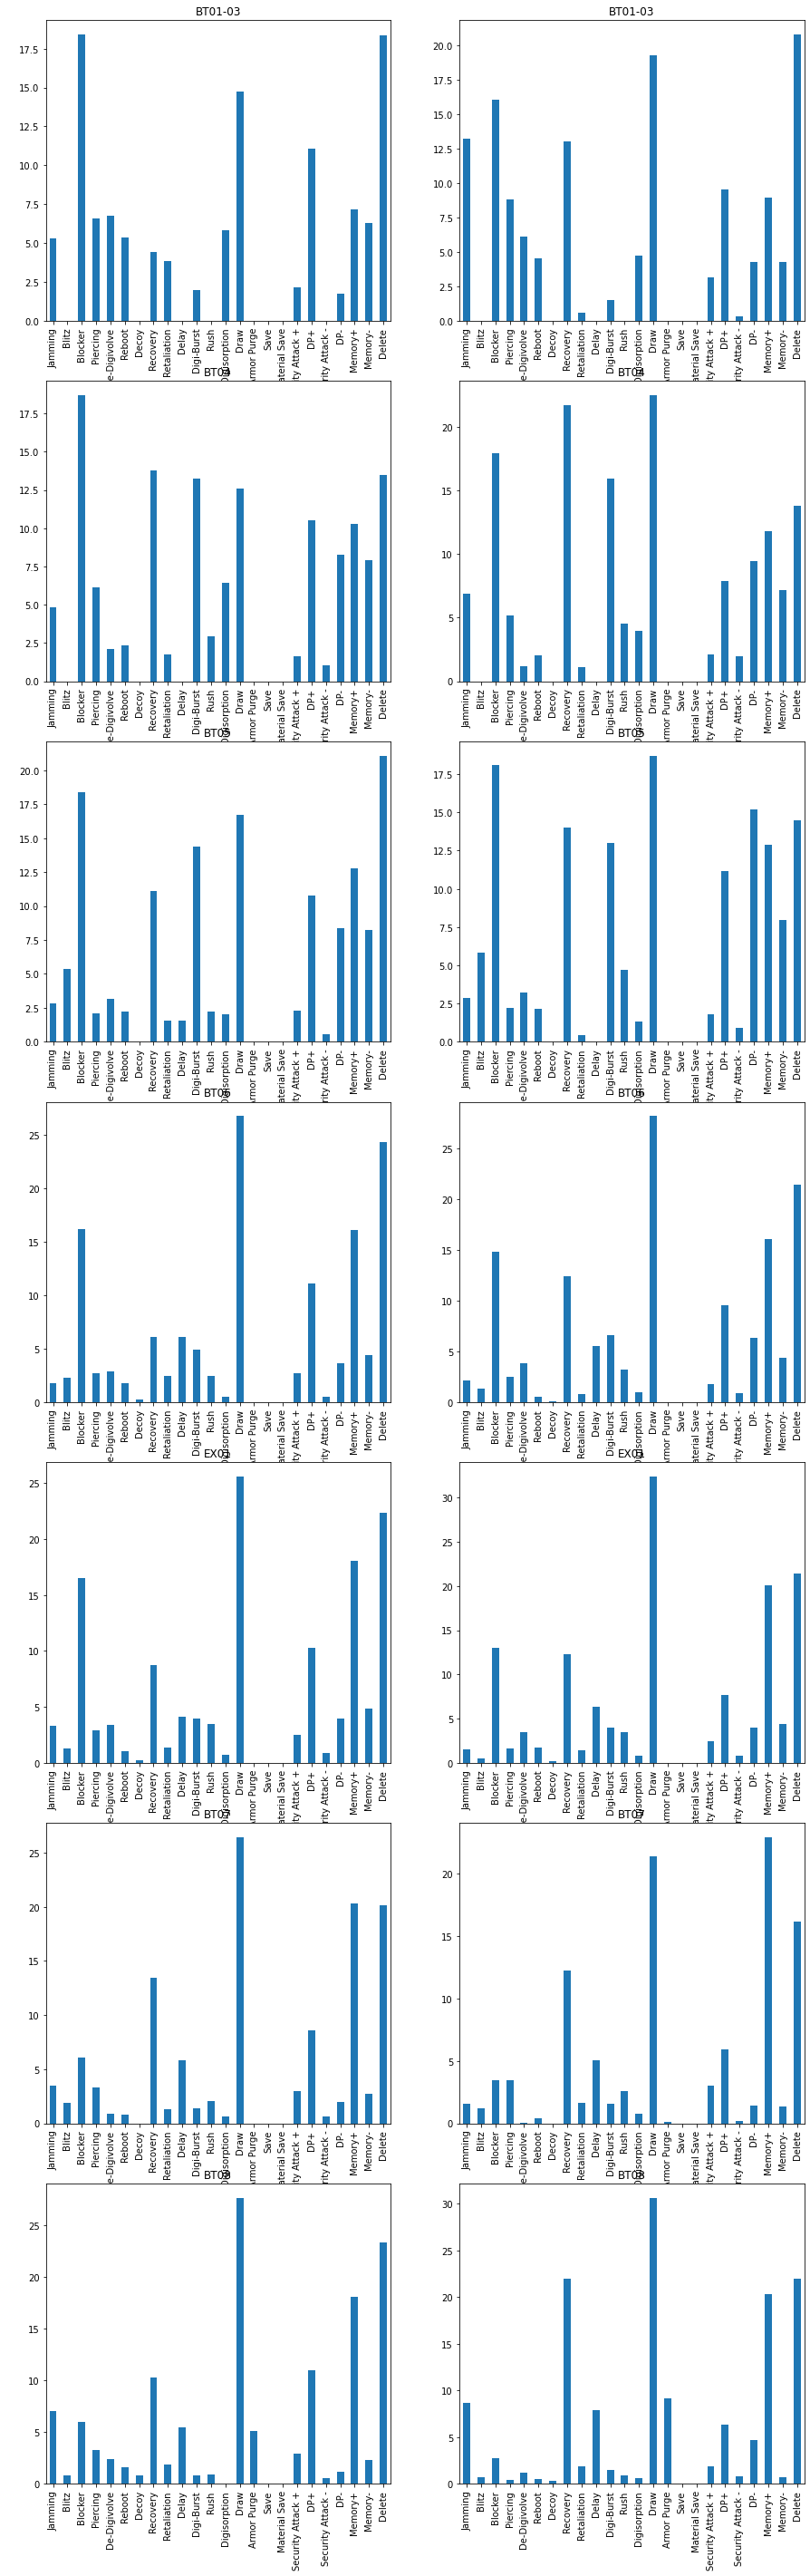

In [224]:
fig, axes = plt.subplots(7,2, figsize=(15,50))
for j in range (0,7):
    jp_meta_keywords[j].plot(ylabel = ' ', kind = 'bar', ax = axes[j][0], title = titles[j])
    west_meta_keywords[j].plot(ylabel = ' ', kind = 'bar', ax = axes[j][1], title = titles[j])


Once again we see differnces in the between the metas.
We can see that keywards that appear in any color like Draw are very dominent in any meta while other keywords change
based on how the color performs in a specific meta

In [225]:
df_complete_nums = df_complete.copy()
df_complete_nums.drop('card_code', axis=1, inplace=True)
df_complete_nums.drop('card_effect', axis=1, inplace=True)
df_complete_nums.drop('security_effect', axis=1, inplace=True)
df_complete_nums.drop('inherited_effect', axis=1, inplace=True)

df_complete_nums.to_csv('file5.csv',index=False)
df_complete_nums

,card_name,card_color,card_rarity,card_type,card_level,digimon_form,digimon_type,play_cost,dp,digimon_attribute,...,Delete,Delete_security,Delete_inherited,purple,white,black,green,yellow,blue,red
0,513,18,6,1,1,5,130,0,-1.0,0,...,0,0,0,0,0,0,0,0,0,1
1,713,18,1,2,2,7,43,3,3000.0,4,...,0,0,0,0,0,0,0,0,0,1
2,16,18,6,2,2,7,176,4,2000.0,4,...,0,0,0,0,0,0,0,0,0,1
3,256,18,1,2,2,7,79,4,4000.0,1,...,0,0,0,0,0,0,0,0,0,1
4,104,18,1,2,3,2,103,5,5000.0,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,225,3,2,2,3,2,57,6,6000.0,6,...,0,0,1,0,0,1,0,0,0,1
1532,982,14,2,2,3,2,206,6,5000.0,1,...,0,0,0,1,0,0,0,0,0,0
1533,16,18,2,2,2,7,176,4,2000.0,4,...,1,0,0,0,0,0,0,0,0,1
1534,526,14,2,2,2,7,34,4,2000.0,4,...,1,0,0,1,0,0,0,0,0,0


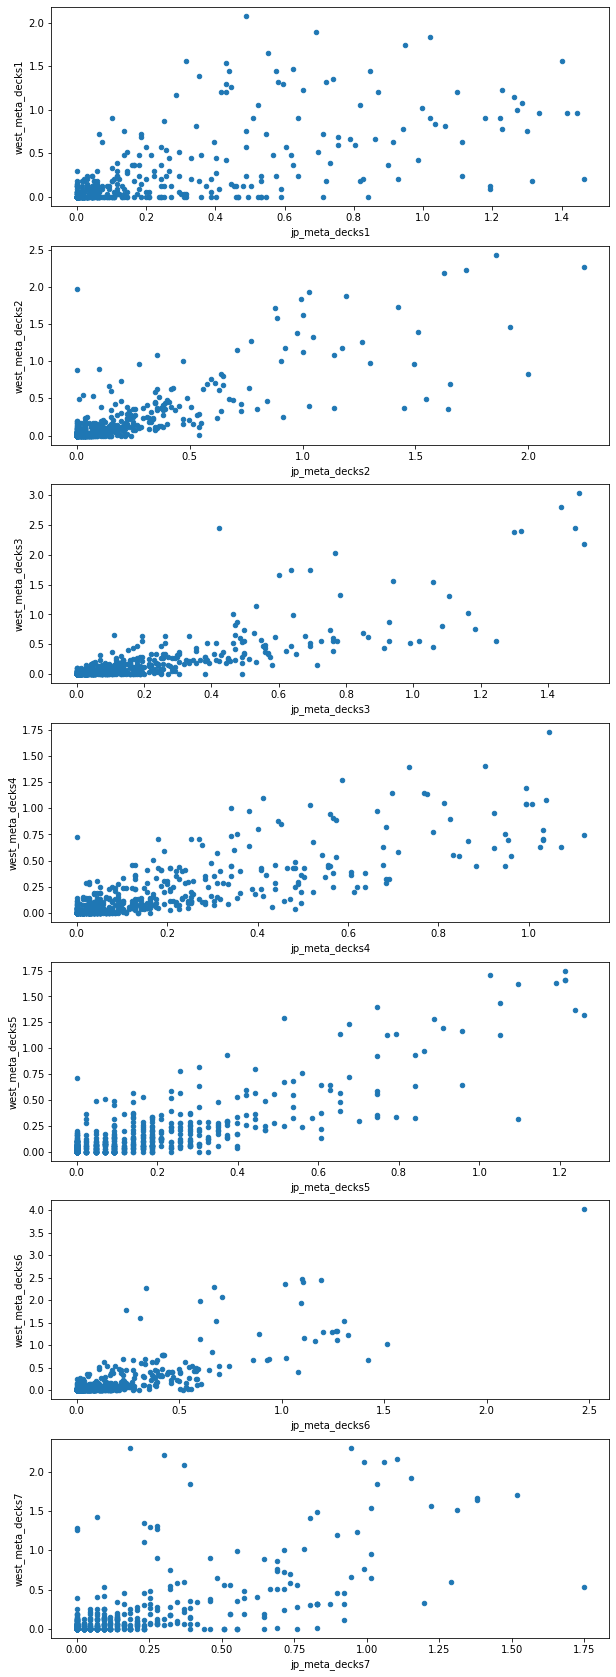

In [260]:
fig, axes = plt.subplots(7,1, figsize=(10,30))
for j in range (0,7):
    df_complete_nums.plot( kind = 'scatter', ax = axes[j], x = 'jp_meta_decks' + str(j+1), y = 'west_meta_decks'  + str(j+1))



In these scatter plots we can see how every card playability is compared to each meta.
we can see how some metas look more liniar then the others and this will affect our results later in our machine lerning model